<br/>

# MSIN0143 Group K Coursework

<br/>

<img src="./car-price-tag.jpg" width="40%"  align="left">

<br/>
<br/>
<br/>
<br/>

<font size=5>**Used Car Market in the U.S.**

<font size=4>*What Factors Influence the Value of a Used Car?*

December 15th, 2020

Word Count: 1986 (excluding reference and appendix)

<div STYLE="page-break-after: always;"></div>

# Contents

&emsp;&emsp;<font size=3>[1. Introduction](#1.-Introduction)  
&emsp;&emsp;<font size=3>[2. Data Description and Visualisation](#2.-Data-Description-and-Visualisation)  
&emsp;&emsp;&emsp;<font size=3>[2.1 Data Description](#2.1-Data-Description)        
&emsp;&emsp;&emsp;<font size=3>[2.2 Data Visualisation](#2.2-Data-Visualisation)   
&emsp;&emsp;<font size=3>[3. Data Cleaning](#3.-Data-Cleaning)  
&emsp;&emsp;<font size=3>[4. Linear Regression Model (OLS)](#4.-Linear-Regression-Model-(OLS))  
&emsp;&emsp;&emsp;<font size=3>[4.1 Checking Correlation](#4.1-Checking-Correlation)        
&emsp;&emsp;&emsp;<font size=3>[4.2 Running the OLS](#4.2-Running-the-OLS)    
&emsp;&emsp;&emsp;<font size=3>[4.3 Prediction Power of OLS](#4.3-Prediction-Power-of-OLS)    
&emsp;&emsp;<font size=3>[5. Decision Tree Model](#5.-Decision-Tree-Model)  
&emsp;&emsp;&emsp;<font size=3>[5.1 Run Decision Tree](#5.1-Run-Decision-Tree)    
&emsp;&emsp;&emsp;<font size=3>[5.2 Prediction Power of Decision Tree](#5.2-Prediction-Power-of-Decision-Tree)  
&emsp;&emsp;<font size=3>[6. Conclusion](#8.-Conclusion)

# 1. Introduction

<font size=3>The U.S. owns the world’s largest used car market. In 2019, there are more than 40 million sales against used cars in the U.S. market, which contains around 35% of the global used-car sales (psmarketresearch, 2020). Meanwhile, the U.S. used car market have experienced continuous expansion since 2009 and reaches $117,942 million in 2019 (carsurance, 2020), as shown in below figure. Compare with sale of new cars, sale of used cars are with double size in the U.S. market (Statista, cited by Sandeep, 2020).

<img src="./Used Car Dealers in the U.S._market size.jpg" width="45%"  align="center">

<font size=3>Our project analyses the driving forces that affect how a used car is priced in this huge and growing market. We aim to identify key points on pricing to help sellers avoid mistakes in their pricing strategies. Respectively, purchasers can reduce asymmetric information in transaction if the forces behind price are better understood. Two models are used to explore potential factors. As conclusion, insightful opinions are made based on the results from Craigslist used car dataset.

In [1]:
#Importing necessary Libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import os
from pandas import Series, DataFrame
import csv
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import MultipleLocator

import seaborn as sns

from sklearn import tree
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

from IPython.display import Image

!pip install yellowbrick
from yellowbrick.target import FeatureCorrelation
from yellowbrick.regressor import ResidualsPlot

# Import neccessary packages for OLS
!pip install statsmodels
import statsmodels.formula.api as sm


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.       

In [2]:
#Read csv data
data_vehicles = pd.read_csv("vehicles.csv")

# 2. Data Description and Visualisation

## 2.1 Data Description 

In [3]:
#Read csv data 
print("Loaded data file {0} with {1} rows and {2} columns".format("vehicles.csv",
            data_vehicles.shape[0], data_vehicles.shape[1]))

Loaded data file vehicles.csv with 423857 rows and 25 columns


<font size=3>The dataset for our project is provided on Kaggle and detailed descriptions are in Appendix 1.


In [4]:
#Take a look at first 5 rows in dataframe
data_vehicles.sample(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
415047,7193563769,https://fortcollins.craigslist.org/ctd/d/fort-...,fort collins / north CO,https://fortcollins.craigslist.org,14374,2015.0,audi,a4,NaN,NaN,...,fwd,NaN,sedan,white,https://images.craigslist.org/00J0J_kN830wcY99...,Crossroads Hyundai of Loveland address: 387...,NaN,co,40.4314,-104.9950
179397,7193662723,https://lancaster.craigslist.org/ctd/d/mount-j...,lancaster,https://lancaster.craigslist.org,3850,2001.0,chrysler,pt cruiser limited,like new,4 cylinders,...,fwd,full-size,NaN,silver,https://images.craigslist.org/00p0p_8wP2ISUoPd...,1 OWNER! CLEAN CARFAX! WARRANTY INCLUDED! 20...,NaN,pa,40.1083,-76.5103
341134,7192598776,https://athensga.craigslist.org/ctd/d/atlanta-...,athens,https://athensga.craigslist.org,28900,2015.0,NaN,Starcraft Allstar 27,NaN,NaN,...,NaN,NaN,other,NaN,https://images.craigslist.org/00k0k_9quBte2BcG...,Creative Bus Sales - Georgia1525 Willingham Dr...,NaN,ga,33.6692,-84.4399
345830,7187278707,https://oklahomacity.craigslist.org/cto/d/edmo...,oklahoma city,https://oklahomacity.craigslist.org,3400,1999.0,ford,ranger,good,NaN,...,NaN,NaN,truck,NaN,https://images.craigslist.org/00p0p_fiDMGzFGFs...,1999 Ford Ranger extended cab 4 seats. Runs an...,NaN,ok,35.6675,-97.5936
286277,7193939551,https://orangecounty.craigslist.org/ctd/d/esco...,orange county,https://orangecounty.craigslist.org,0,2020.0,toyota,corolla,NaN,NaN,...,NaN,NaN,sedan,NaN,https://images.craigslist.org/00101_9ZkhBSLo4F...,2020 Toyota Corolla LE FWD 4dr Car Offered by...,NaN,ca,33.1605,-117.0980


In [5]:
# Find out the types of the data
data_vehicles.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   url           423857 non-null  object 
 2   region        423857 non-null  object 
 3   region_url    423857 non-null  object 
 4   price         423857 non-null  int64  
 5   year          328743 non-null  float64
 6   manufacturer  313242 non-null  object 
 7   model         325384 non-null  object 
 8   condition     176719 non-null  object 
 9   cylinders     197679 non-null  object 
 10  fuel          327214 non-null  object 
 11  odometer      270585 non-null  float64
 12  title_status  327759 non-null  object 
 13  transmission  328065 non-null  object 
 14  vin           184420 non-null  object 
 15  drive         231119 non-null  object 
 16  size          102627 non-null  object 
 17  type          241157 non-null  object 
 18  pain

In [6]:
print(data_vehicles.describe(include = 'all'))

                  id                                                url  \
count   4.238570e+05                                             423857   
unique           NaN                                             423857   
top              NaN  https://grandrapids.craigslist.org/cto/d/grand...   
freq             NaN                                                  1   
mean    7.190602e+09                                                NaN   
std     5.159269e+06                                                NaN   
min     7.178302e+09                                                NaN   
25%     7.186688e+09                                                NaN   
50%     7.192068e+09                                                NaN   
75%     7.194909e+09                                                NaN   
max     7.197006e+09                                                NaN   

          region                    region_url         price           year  \
count     423857    

<font size=3>As the data currently contains a large number of missing values for a lot of its variables, computing the summary statistics is not very helpful. Hence, we will first examine the missing values and clean the dataset accordingly. The visualisation below shows that missing values are sparsely located across the observations for certain variables. Almost half of the data is missing for the variables `condition`, `cylinders`, `vin`, `drive`, ` size`, `type` and `paint_color`. 

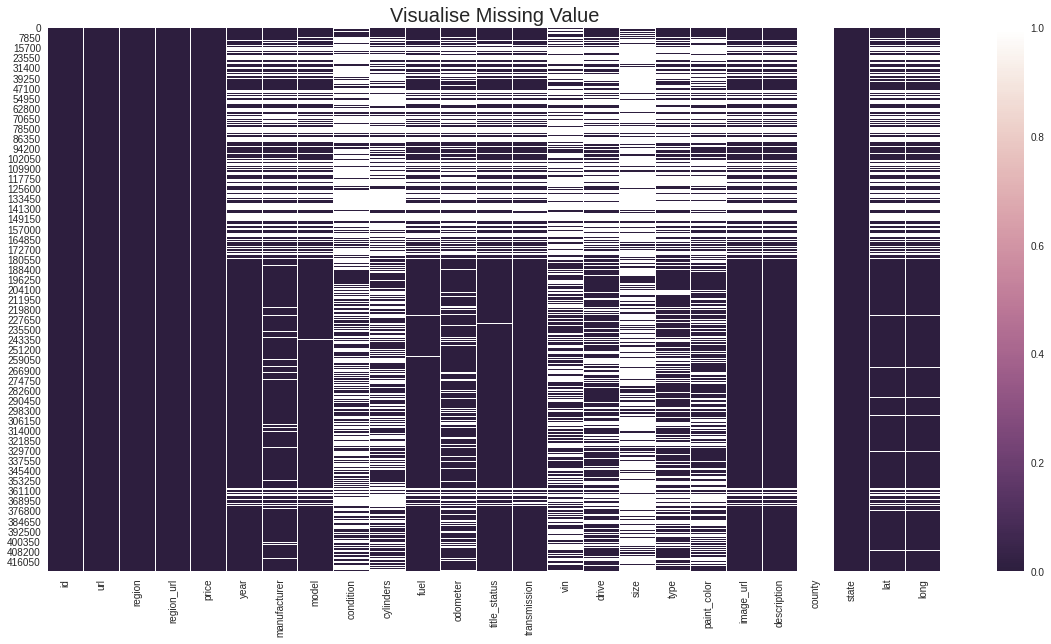

In [7]:
plt.figure(figsize=(20, 10))
plt.title("Visualise Missing Value", fontsize =20) 

# Use cubehelix palette to make a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)

# Visualise missing data
sns.heatmap(data_vehicles.isnull(), cmap=cmap);

## 2.2 Data Visualisation

#### Examining the `price` variable ####

<font size=3>Currently, the listed prices contain a large number of outliers, which skew the distribution of the `price`. As shown in the plot, due to the presence of 35025 cars listed at the price of 0, the distribution is heavily right-skewed. Meanwhile, several cars are sold in the millions, bringing the mean price up to 6000 although the top 10 prices with the highest occurence are all well below 6000. There is also a number of obviously invalid data points, such as prices of 999,999,999 and 123,456,789, which need to be removed. 

count    4.238570e+05
mean     5.779437e+04
std      1.002581e+07
min      0.000000e+00
25%      4.499000e+03
50%      9.995000e+03
75%      1.899500e+04
max      3.808256e+09
Name: price, dtype: float64

Total cars with listed price 0 is 35025
0       35025
3500     3865
8995     3589
7995     3537
4500     3465
6995     3458
2500     3433
5995     3359
9995     3350
5500     3136
Name: price, dtype: int64


(0.0, 3808256046.0)

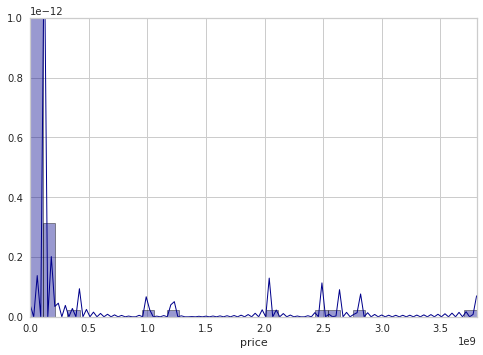

In [8]:
#summary statistics of the prices
data_vehicles['price'].describe()

#number of cars with a price of 0
print("Total cars with listed price 0 is", len(data_vehicles[data_vehicles.price==0]))

#prices that show up with the highest frequency 
print (data_vehicles['price'].value_counts().iloc[:10])

#distribution plot of prices with the plotted gaussian kernel density estimate.
fig,ax=plt.subplots()
sns.set(rc={"figure.figsize": (10, 7)})
sns.distplot(data_vehicles['price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1},ax=ax)

ax.set_xlim(0,max(data_vehicles['price']))
plt.show()

<font size=3>Comparing the boxplots excluding the outliers with the one including them, it is evident how the inclusion of these outliers skew the distribution of prices. The large standard deviation of `price` is also evidence for the huge variation within prices. 

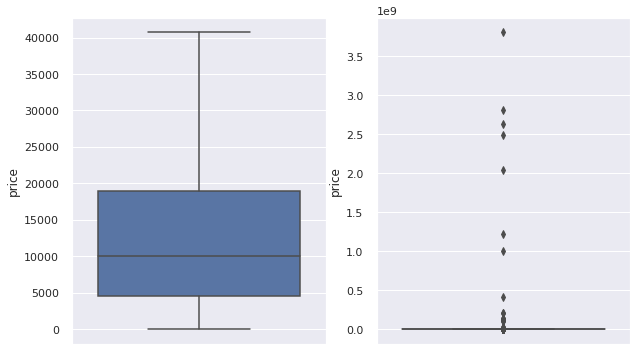

In [9]:
#boxplot without the outliers
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1,)
sns.boxplot(y='price', data=data_vehicles,showfliers=False);

#boxplot with the outliers
plt.subplot(1, 2, 2)
sns.boxplot(y='price', data=data_vehicles);

<font size=3>Exploring the car's location and brand distribution across our dataset

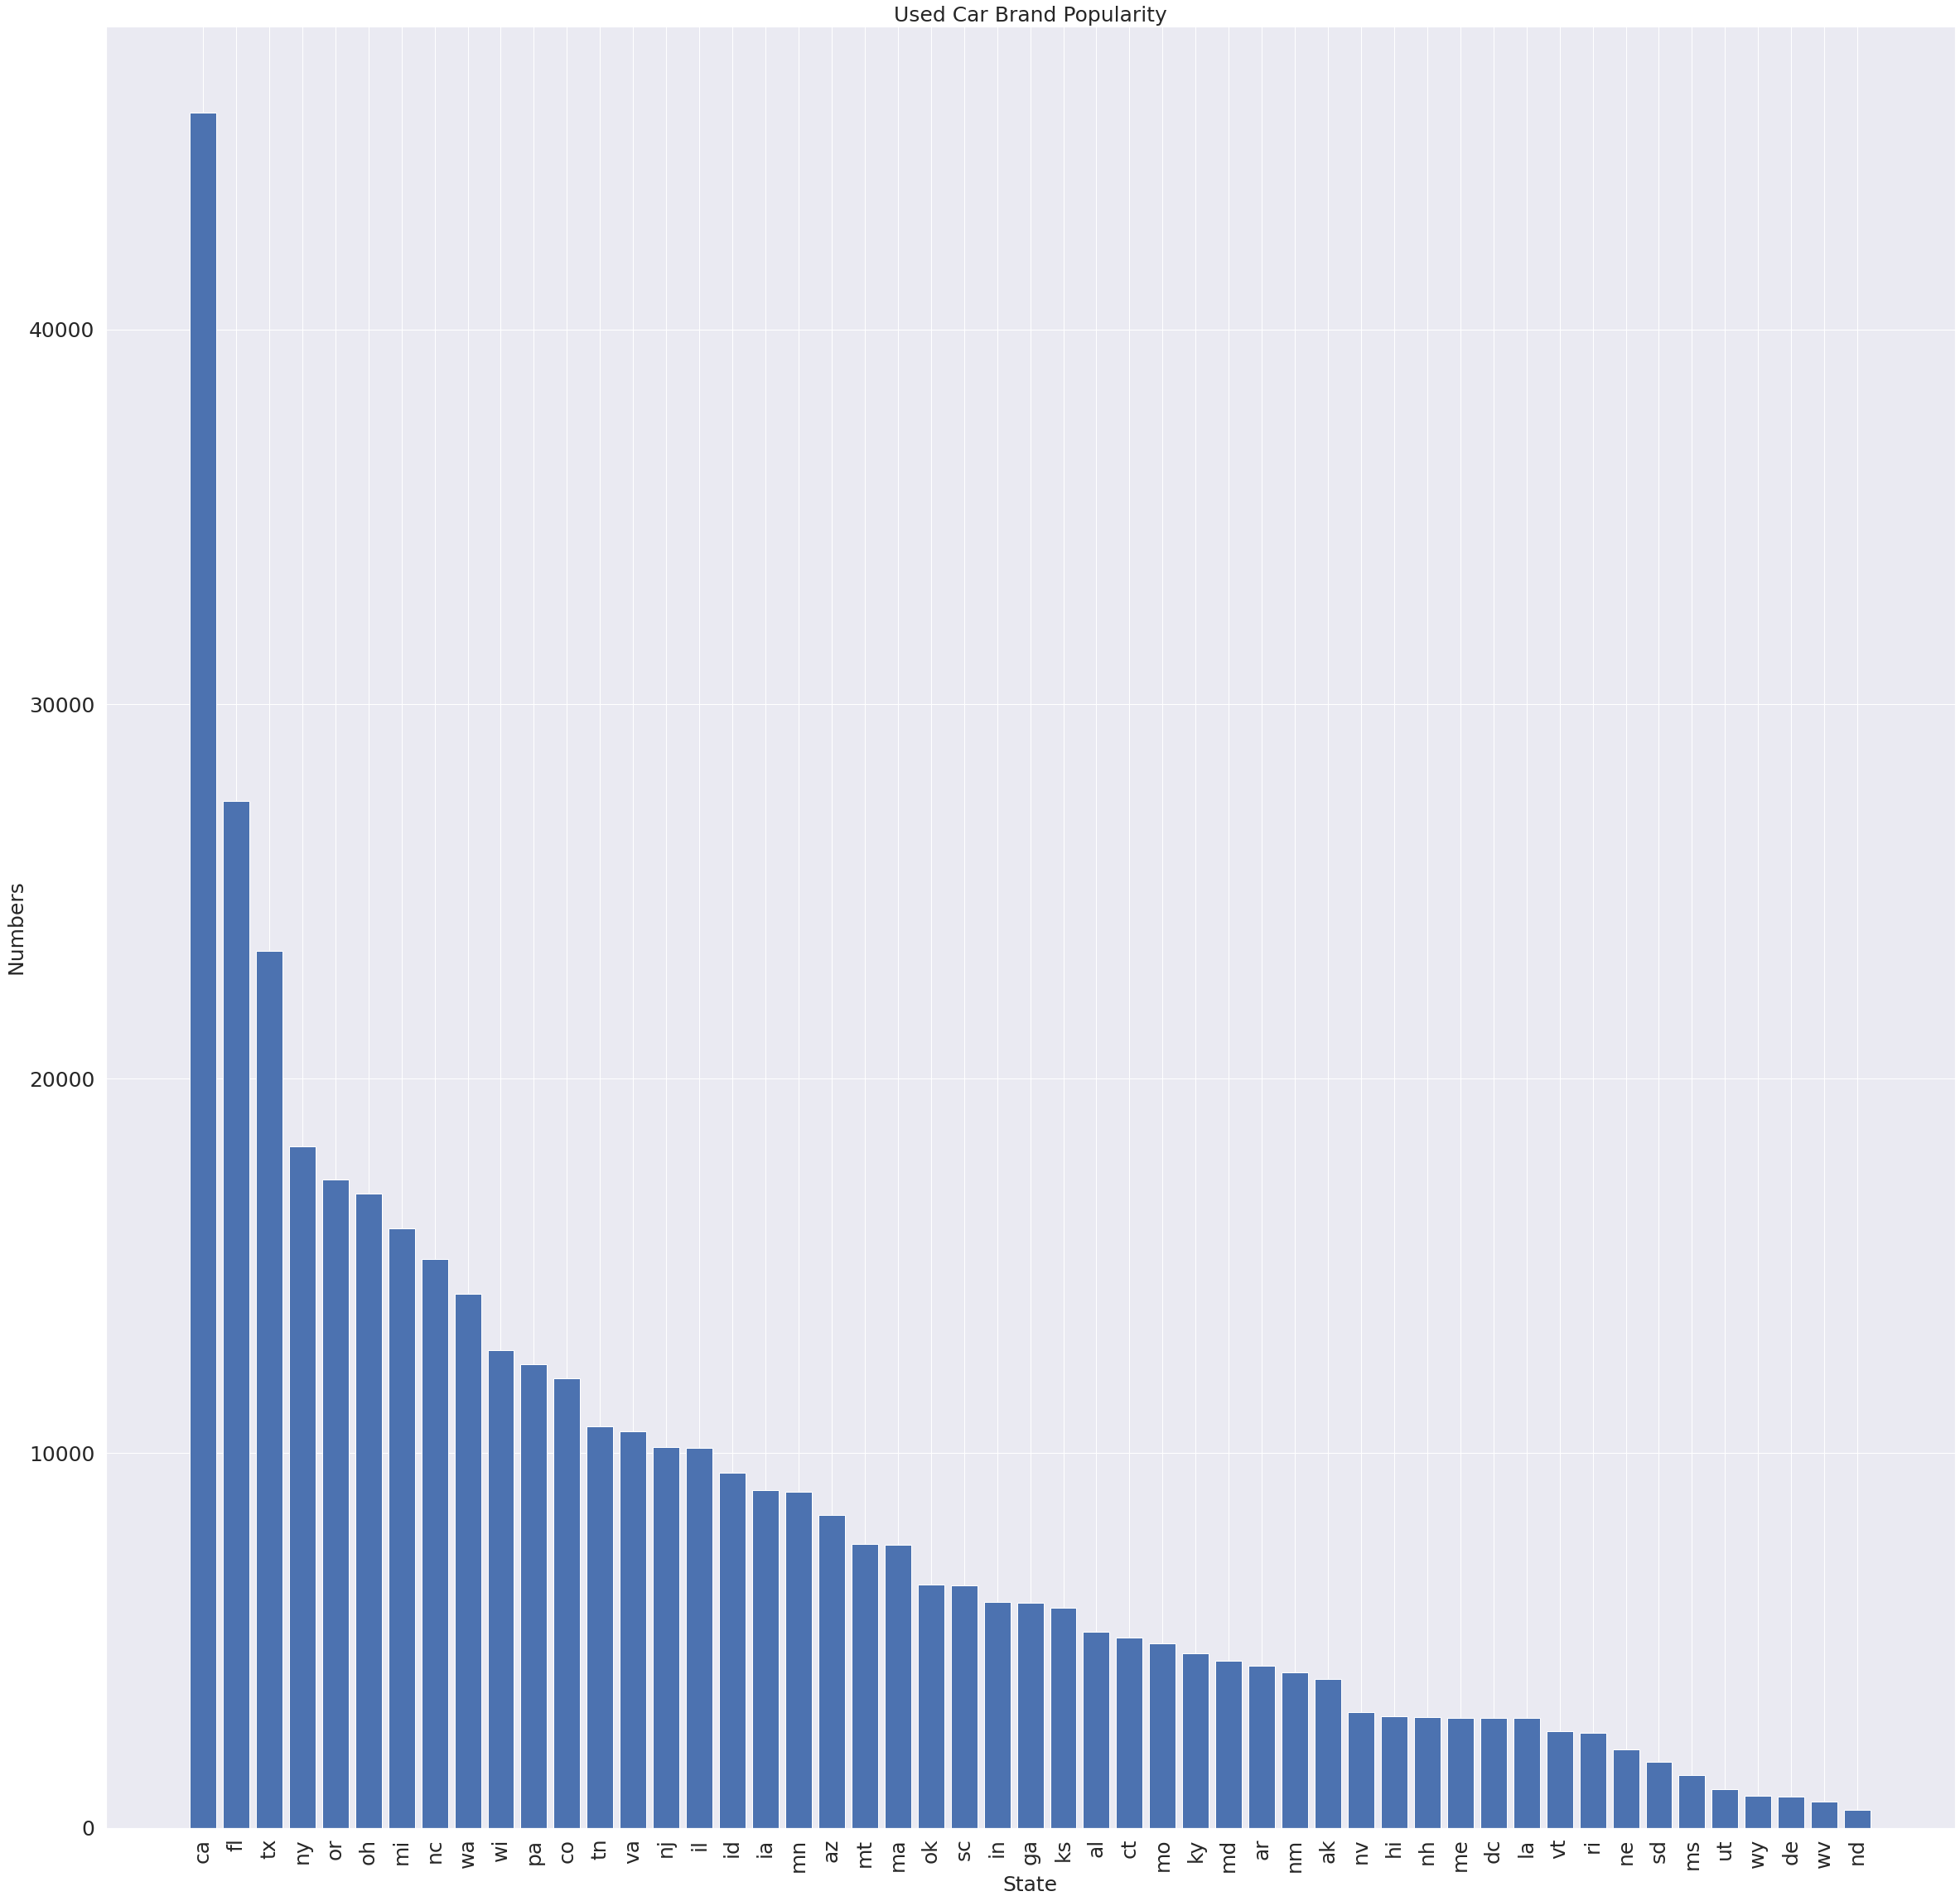

In [10]:
#The following code tries to demonstrate the geographical distribution of the US used cars and find out the TOP 3 states that hold the
#used car inventory
a = data_vehicles[['state', 'id']].groupby('state').count()
a = a.sort_values(by=["id"],ascending = False)

plt.figure(figsize=(40,40))
plt.bar(a.index, a['id'])
plt.title('Used Car Brand Popularity', fontsize=25)
plt.xlabel('State', fontsize=25)
plt.ylabel('Numbers', fontsize=25)
plt.tick_params(labelsize=25)
plt.xticks(rotation='vertical')
plt.show();

In [11]:
# Top 3 manufacturer
a[:3:1]
#From the visualisation above, we know that Califonia, Floria, Texas hold more used cars inventary.

,id
state,
ca,45798
fl,27413
tx,23411


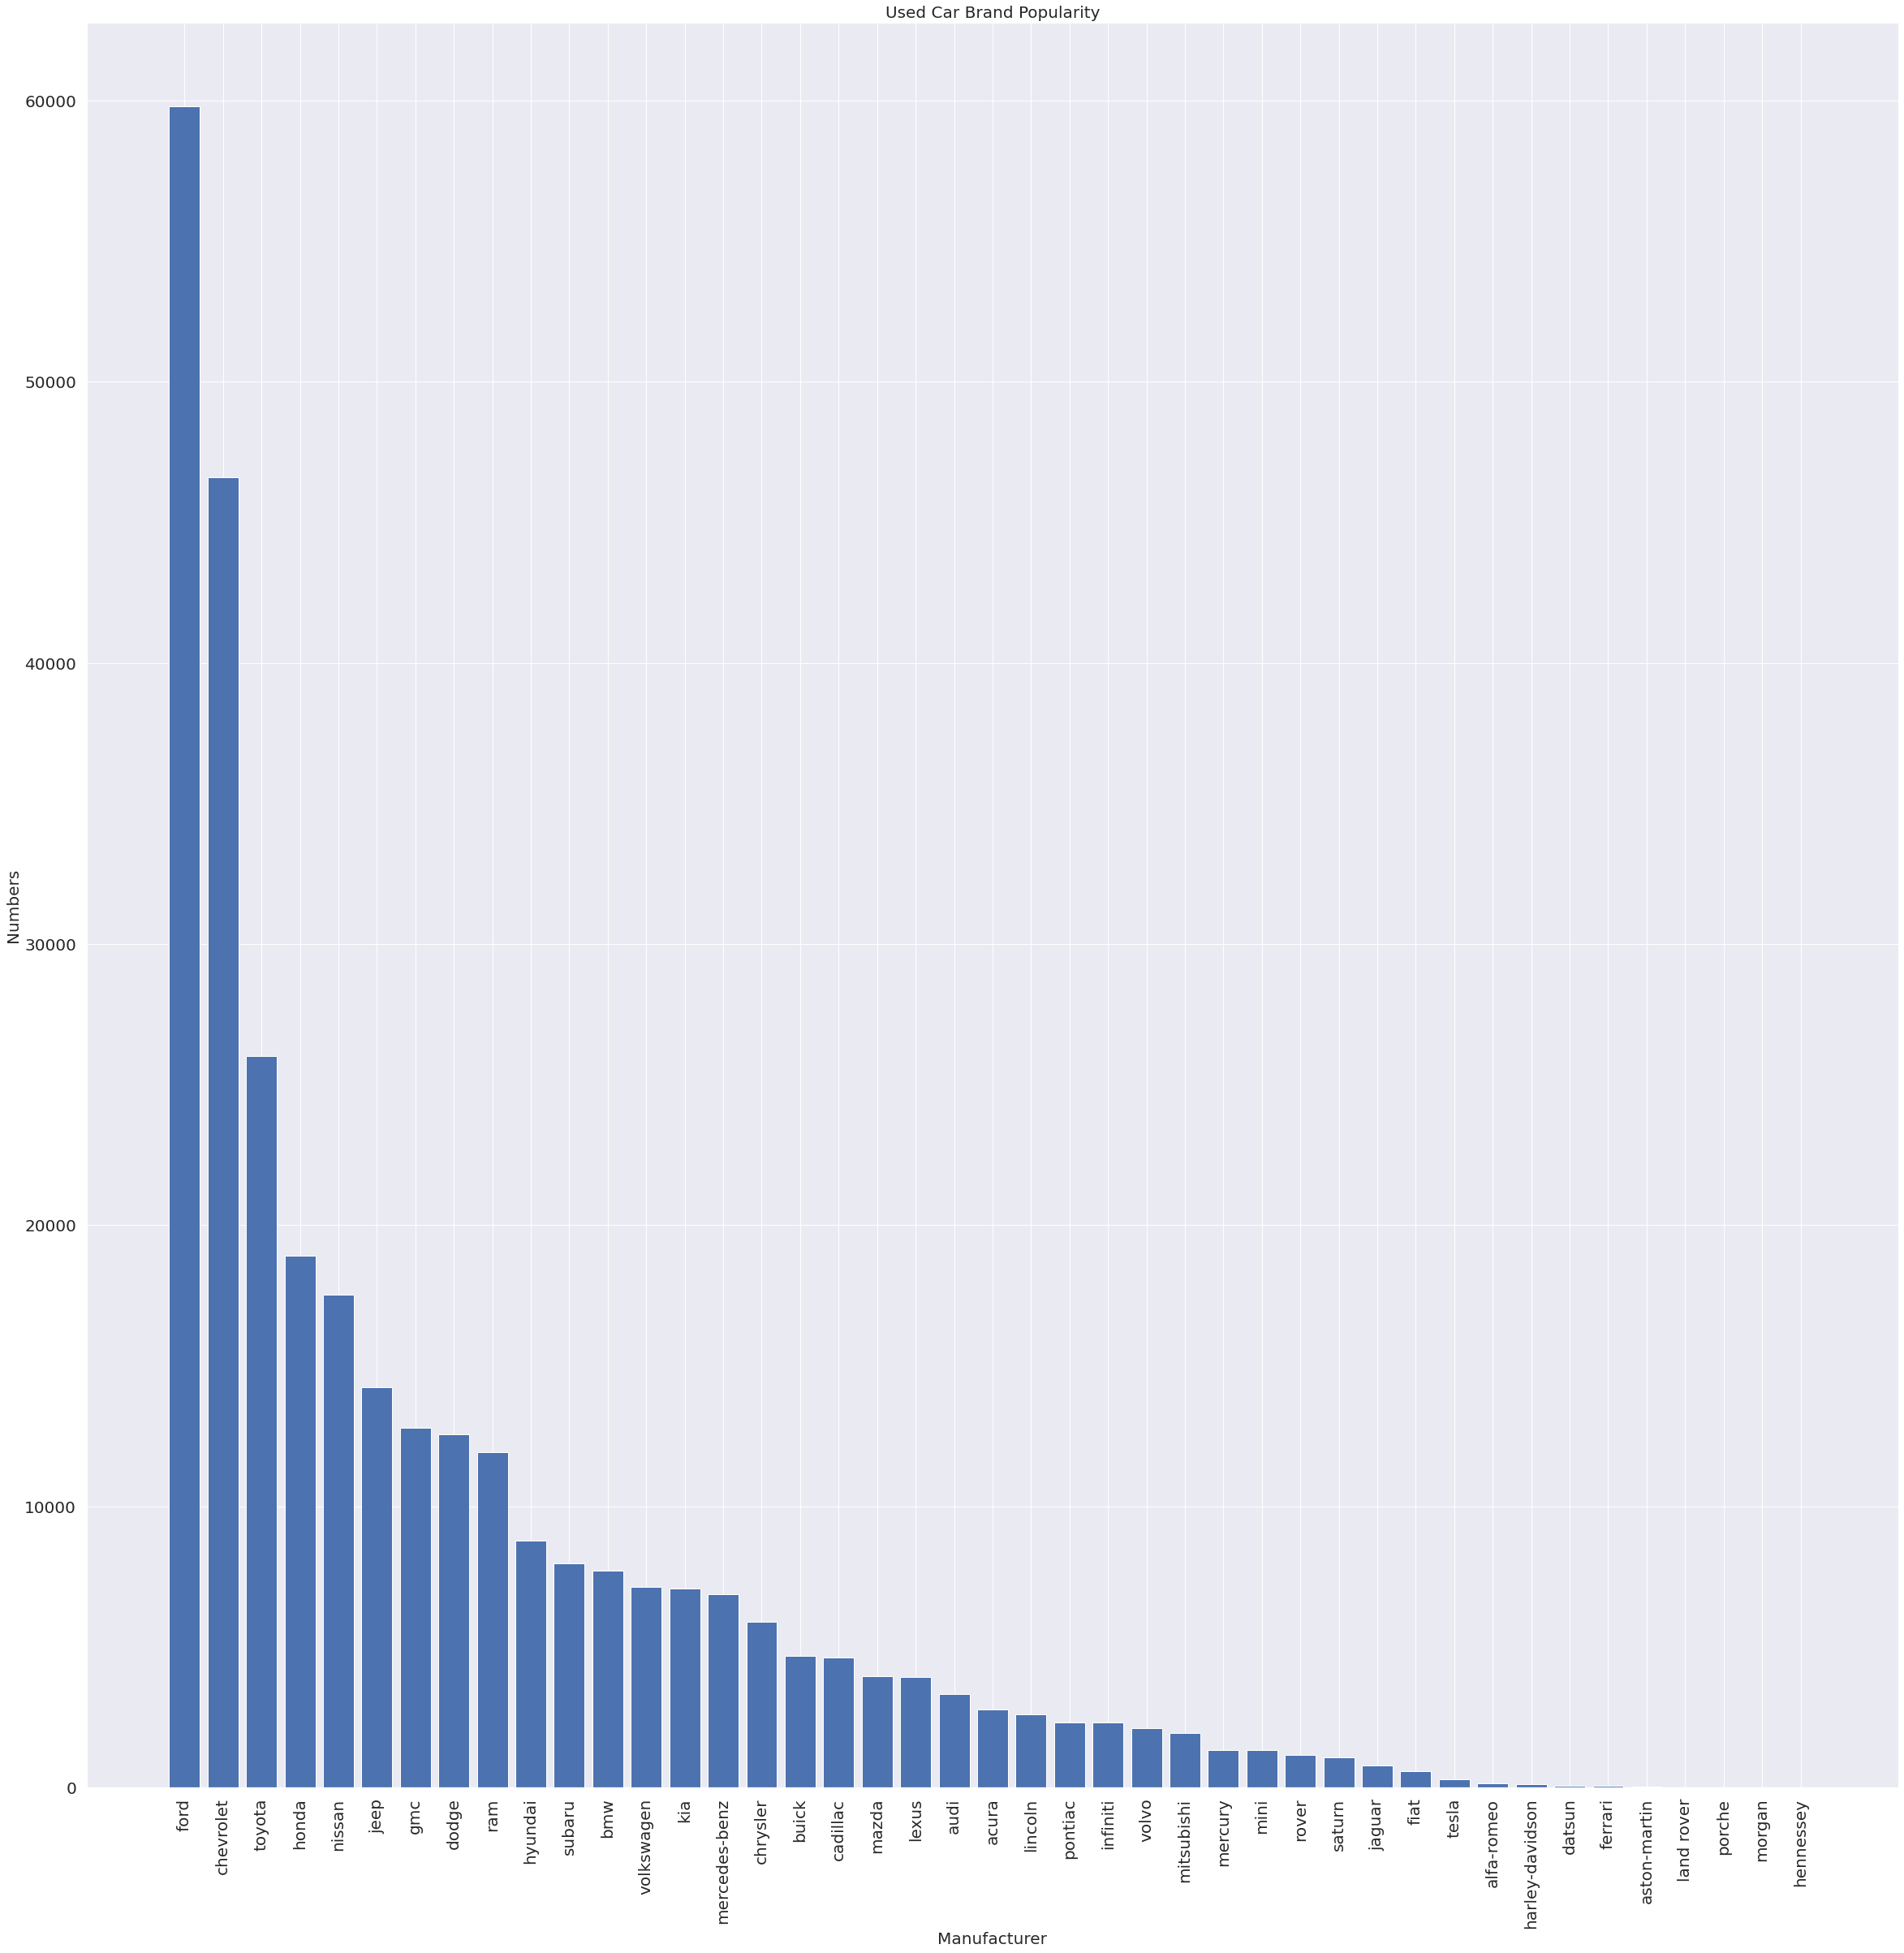

In [12]:
b = data_vehicles[['manufacturer', 'id']].groupby('manufacturer').count()
b = b.sort_values(by=["id"],ascending = False)

plt.figure(figsize=(40,40))
plt.bar(b.index, b['id'])
plt.title('Used Car Brand Popularity', fontsize=20)
plt.xlabel('Manufacturer', fontsize=20)
plt.ylabel('Numbers', fontsize=20)
plt.tick_params(labelsize=20)
plt.xticks(rotation='vertical')
plt.show();

In [13]:
# Top 3 manufacturer
b[:3:1]

,id
manufacturer,
ford,59786
chevrolet,46603
toyota,26001


# 3. Data Cleaning

<font size=3> Remove descriptive columns and columns that have more than 45% missing values to prevent potential bias.

In [14]:
# Dropping unused columns in our analysis
data_vehicles = data_vehicles.drop(["url", "region", "region_url", "vin", "image_url", "description", "cylinders", "fuel", "paint_color", "county"], axis=1)

<font size=3>Intuitively, we concluded that `Condition`, `Size`, `Type`, `Manufacturer` and `Drive` may be the determinant factors to predict used cars' prices. Therefore, rows without any of the value will be removed from this analysis. `Odometer`, `Model`, and `Transmission` are important factors too, but since the missing values is less than 15%, we will impute them later.

In [15]:
# Dropping row with missing crucial values for analysis
data_vehicles = data_vehicles.dropna(axis=0, subset=['condition'])
data_vehicles = data_vehicles.dropna(axis=0, subset=['size'])
data_vehicles = data_vehicles.dropna(axis=0, subset=['type'])
data_vehicles = data_vehicles.dropna(axis=0, subset=['manufacturer'])
data_vehicles = data_vehicles.dropna(axis=0, subset=['drive'])

In [16]:
# Remove salvage and parts only cars advertisements because the price will be anomalous
# Not needed for the analysis
data_vehicles.drop(data_vehicles[data_vehicles.condition == "salvage"].index, inplace=True)
data_vehicles.drop(data_vehicles[data_vehicles.title_status == "salvage"].index, inplace=True)
data_vehicles.drop(data_vehicles[data_vehicles.title_status == "parts only"].index, inplace=True)

<font size=3>As prices are listed by users, there might be some users who intentionally put the price as 0 to gain more attention. This data will introduce bias on our analysis, so we will remove car with price lower than 1000 and use inter-quartile range to remove outliers.

In [17]:
# Remove data with price less than 1000
data_vehicles.drop(data_vehicles[data_vehicles.price < 1000].index, inplace=True)

# Remove outliers by price using inter-quartile range 
Q1 = data_vehicles["price"].quantile(0.25)
Q3 = data_vehicles["price"].quantile(0.75)
IQR = Q3 - Q1
data_vehicles = data_vehicles[~((data_vehicles["price"] < (Q1 - 1.5 * IQR)) |(data_vehicles["price"] > (Q3 + 1.5 * IQR)))]

# Check final condition for price
print(data_vehicles["price"].describe())

count    65277.000000
mean     10398.145028
std       7051.690358
min       1000.000000
25%       4990.000000
50%       8500.000000
75%      14500.000000
max      32466.000000
Name: price, dtype: float64


In [18]:
# Method to encode categorical variables

#instantiate both packages to use
encoder = OrdinalEncoder()

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

In [19]:
# Identified categorical columns we need to encode
cat_cols = ["manufacturer", "model", "condition", "title_status", "transmission", "drive", "size", "type", "state"]

data_vehicles_encode = data_vehicles.copy()
# We need to decode them later for interpretation, encoded_map is introduced to keep encoding mapping.
encoded_map = {}
for columns in cat_cols:
    encode(data_vehicles[columns])
    values = []
    for x in data_vehicles[columns]:
        values.append(x)
    keys = []
    for y in data_vehicles_encode[columns]:
        keys.append(y)

    encoder_map = {str(values[i]):str(keys[i]) for i in range(len(keys))}
    encoded_map[columns] = encoder_map

data_vehicles

3         28.0
4         13.0
5         12.0
6          6.0
7          6.0
          ... 
423844    12.0
423845    38.0
423849    34.0
423851    12.0
423853    36.0
Name: manufacturer, Length: 65277, dtype: float64

3         4939
4         6852
5         3410
6         3067
7         7859
          ... 
423844    3589
423845    8331
423849    4081
423851    5516
423853    6720
Name: model, Length: 65277, dtype: object

3         2.0
4         2.0
5         2.0
6         2.0
7         2.0
         ... 
423844    2.0
423845    0.0
423849    0.0
423851    2.0
423853    0.0
Name: condition, Length: 65277, dtype: float64

3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
         ... 
423844    0.0
423845    0.0
423849    0.0
423851    0.0
423853    0.0
Name: title_status, Length: 65277, dtype: float64

3         1
4         0
5         0
6         0
7         0
         ..
423844    1
423845    0
423849    0
423851    0
423853    0
Name: transmission, Length: 65277, dtype: object

3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
         ... 
423844    2.0
423845    0.0
423849    0.0
423851    2.0
423853    0.0
Name: drive, Length: 65277, dtype: float64

3         2.0
4         1.0
5         1.0
6         1.0
7         1.0
         ... 
423844    1.0
423845    1.0
423849    2.0
423851    0.0
423853    1.0
Name: size, Length: 65277, dtype: float64

3          9.0
4         10.0
5         10.0
6          0.0
7          0.0
          ... 
423844    11.0
423845    12.0
423849     4.0
423851     3.0
423853     0.0
Name: type, Length: 65277, dtype: float64

3         32.0
4         23.0
5         23.0
6         23.0
7         23.0
          ... 
423844    23.0
423845    34.0
423849     6.0
423851    32.0
423853    23.0
Name: state, Length: 65277, dtype: float64

,id,price,year,manufacturer,model,condition,odometer,title_status,transmission,drive,size,type,state,lat,long
3,7195108810,12500,2003.0,28.0,4939,2.0,NaN,0.0,1,0.0,2.0,9.0,32.0,35.1868,-106.6650
4,7184712241,16995,2007.0,13.0,6852,2.0,254217.0,0.0,0,0.0,1.0,10.0,23.0,45.6836,-92.9648
5,7184711787,13995,2012.0,12.0,3410,2.0,188406.0,0.0,0,0.0,1.0,10.0,23.0,45.6836,-92.9648
6,7184710887,7995,2010.0,6.0,3067,2.0,108124.0,0.0,0,0.0,1.0,0.0,23.0,45.6836,-92.9648
7,7184710023,8995,2011.0,6.0,7859,2.0,178054.0,0.0,0,0.0,1.0,0.0,23.0,45.6836,-92.9648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423844,7185155996,6000,1994.0,12.0,3589,2.0,37000.0,0.0,1,2.0,1.0,11.0,23.0,46.5350,-92.6190
423845,7195062876,1600,2004.0,38.0,8331,0.0,292255.0,0.0,0,0.0,1.0,12.0,34.0,42.3496,-73.5873
423849,7193376881,9885,2012.0,34.0,4081,0.0,82000.0,0.0,0,0.0,2.0,4.0,6.0,41.3323,-72.7809
423851,7195116656,4800,2002.0,12.0,5516,2.0,58000.0,0.0,0,2.0,0.0,3.0,32.0,34.8543,-106.6960


In [20]:
#use knn imputer for missing values in odometer, model, and transmission
nan = np.nan
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit_transform(data_vehicles)
data_vehicles_cleaned = pd.DataFrame(np.round(imputer.fit_transform(data_vehicles)),columns = data_vehicles.columns)

array([[ 7.19510881e+09,  1.25000000e+04,  2.00300000e+03, ...,
         3.20000000e+01,  3.51868000e+01, -1.06665000e+02],
       [ 7.18471224e+09,  1.69950000e+04,  2.00700000e+03, ...,
         2.30000000e+01,  4.56836000e+01, -9.29648000e+01],
       [ 7.18471179e+09,  1.39950000e+04,  2.01200000e+03, ...,
         2.30000000e+01,  4.56836000e+01, -9.29648000e+01],
       ...,
       [ 7.19337688e+09,  9.88500000e+03,  2.01200000e+03, ...,
         6.00000000e+00,  4.13323000e+01, -7.27809000e+01],
       [ 7.19511666e+09,  4.80000000e+03,  2.00200000e+03, ...,
         3.20000000e+01,  3.48543000e+01, -1.06696000e+02],
       [ 7.18484458e+09,  9.00000000e+03,  2.00300000e+03, ...,
         2.30000000e+01,  4.69369000e+01, -9.19325000e+01]])

In [21]:
# Decode encoded data to its name
data_vehicles_cleaned['transmission'] = [encoded_map['transmission'][str(i)] for i in data_vehicles_cleaned['transmission']] 
data_vehicles_cleaned['manufacturer'] = [encoded_map['manufacturer'][str(i)] for i in data_vehicles_cleaned['manufacturer']] 
data_vehicles_cleaned['model'] = [encoded_map['model'][str(i)] for i in data_vehicles_cleaned['model']] 
data_vehicles_cleaned['condition'] = [encoded_map['condition'][str(i)] for i in data_vehicles_cleaned['condition']] 
data_vehicles_cleaned['title_status'] = [encoded_map['title_status'][str(i)] for i in data_vehicles_cleaned['title_status']] 
data_vehicles_cleaned['drive'] = [encoded_map['drive'][str(i)] for i in data_vehicles_cleaned['drive']] 
data_vehicles_cleaned['size'] = [encoded_map['size'][str(i)] for i in data_vehicles_cleaned['size']] 
data_vehicles_cleaned['type'] = [encoded_map['type'][str(i)] for i in data_vehicles_cleaned['type']] 
data_vehicles_cleaned['state'] = [encoded_map['state'][str(i)] for i in data_vehicles_cleaned['state']] 

data_vehicles_cleaned.head()

,id,price,year,manufacturer,model,condition,odometer,title_status,transmission,drive,size,type,state,lat,long
0,7.195109e+09,12500.0,2003.0,mitsubishi,lancer,good,107674.0,clean,manual,4wd,mid-size,sedan,nm,35.0,-107.0
1,7.184712e+09,16995.0,2007.0,gmc,sierra classic 2500hd,good,254217.0,clean,automatic,4wd,full-size,truck,mn,46.0,-93.0
2,7.184712e+09,13995.0,2012.0,ford,f-150,good,188406.0,clean,automatic,4wd,full-size,truck,mn,46.0,-93.0
3,7.184711e+09,7995.0,2010.0,chevrolet,equinox,good,108124.0,clean,automatic,4wd,full-size,SUV,mn,46.0,-93.0
4,7.184710e+09,8995.0,2011.0,chevrolet,traverse,good,178054.0,clean,automatic,4wd,full-size,SUV,mn,46.0,-93.0


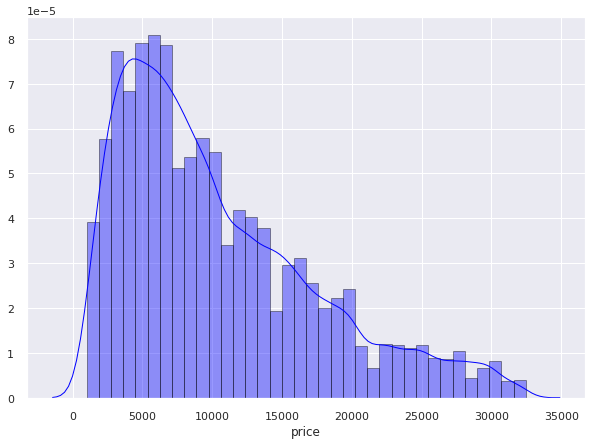

In [22]:
#with the plotted gaussian kernel density estimate.
sns.distplot(data_vehicles_cleaned['price'], hist=True, kde=True,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})


<font size=3>Logically, we believe that age might have strong impact to price, so we add variable `age`.

In [23]:
# Generate age of used cars with year
# It assumes that the year for analysis is 2020, so remove ads with year larger than 2020
data_vehicles_cleaned[['year', 'id']][data_vehicles_cleaned['year']>2020].groupby('year').count()
data_vehicles_cleaned = data_vehicles_cleaned[data_vehicles_cleaned['year']<=2020]

len(data_vehicles_cleaned)
data_vehicles_cleaned['age'] = 2020 - data_vehicles_cleaned['year']
len(data_vehicles_cleaned)

,id
year,
2021.0,7


65270

65270

<font size=3> Data Visualisation - Key relationships that might affect price for used cars.

<font size=3> Apart from fair condition which has lower price pattern, all other conditions seem spread across the price range

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


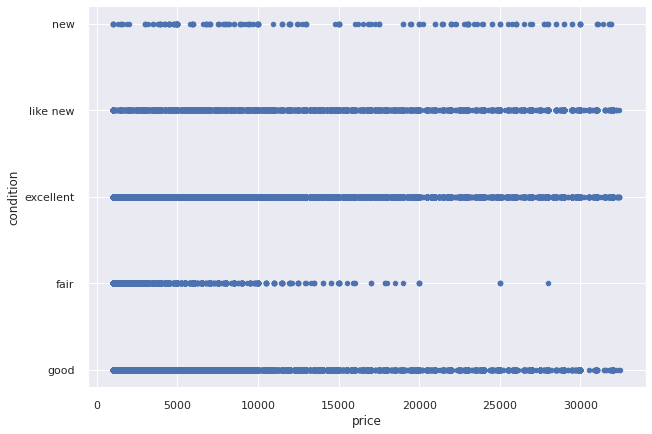

In [24]:
# Price and condition relationship
data_vehicles_cleaned.plot('price','condition', kind = 'scatter');

<font size=3> Tesla shows higher price trend, while land rover and saturn show have lower than average prices

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


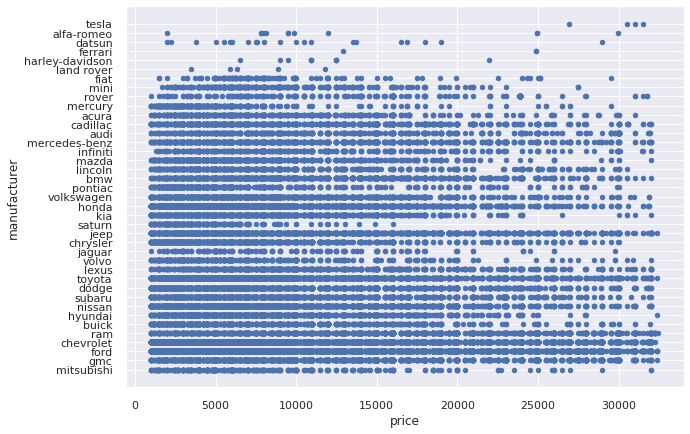

In [25]:
data_vehicles_cleaned.plot('price','manufacturer', kind = 'scatter');

<font size=3> The trend line makes sense since newer car will have higher price

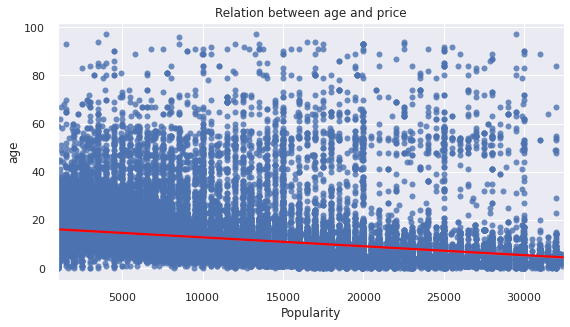

In [26]:
# Price and age relationship
features = ['age']

figure = plt.figure(figsize=(15,25))
for variable,num in zip(features, range(1,len(features)+1)):
    ax = figure.add_subplot(6,2,num)
    sns.regplot('price',variable, line_kws={"color": "red"},data=data_vehicles_cleaned)
    plt.title('Relation between {} and price'.format(variable))
    plt.xlabel('Popularity')
    plt.ylabel(variable)
figure.tight_layout(pad=0.5);

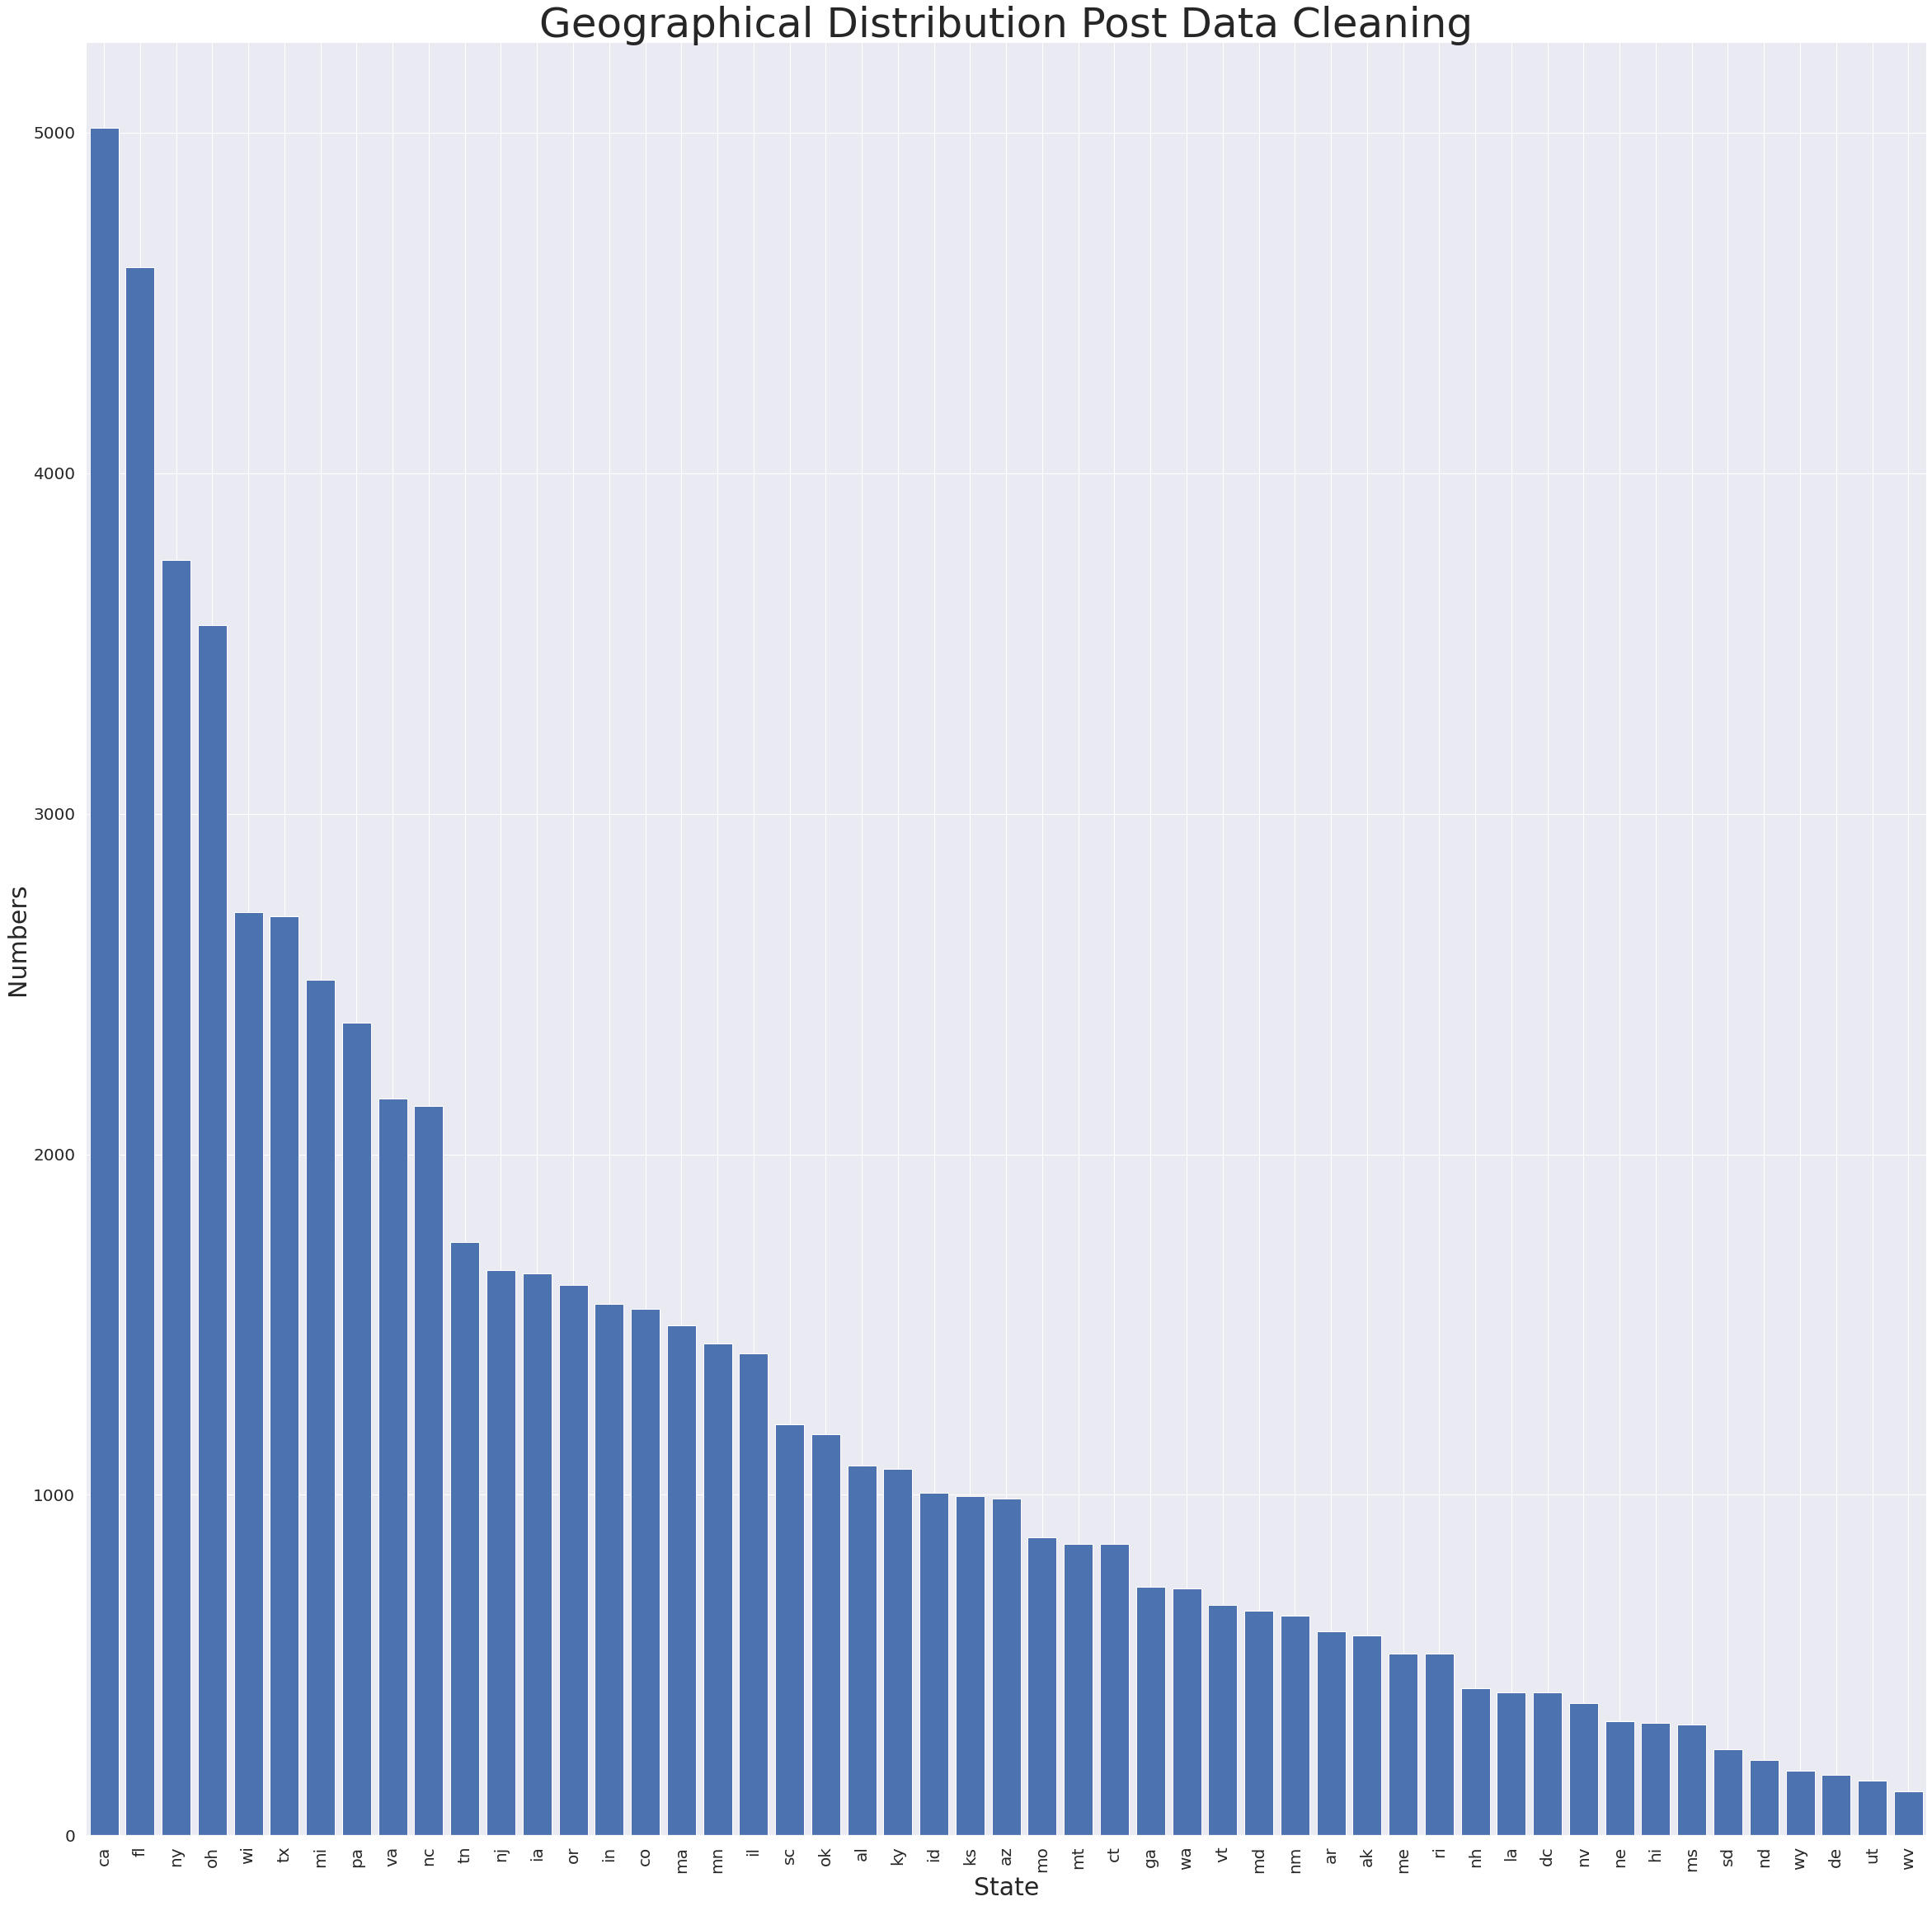

In [27]:
# In the following part, we take another look at the geographical distribution and brand popularity after data cleaning.
c = data_vehicles_cleaned[['state', 'id']].groupby('state').count()
c = c.sort_values(by=["id"],ascending = False)

plt.figure(figsize=(40,40))
plt.bar(c.index, c['id'])
plt.title('Geographical Distribution Post Data Cleaning', fontsize=50)
plt.xlabel('State', fontsize=30)
plt.ylabel('Numbers', fontsize=30)
plt.tick_params(labelsize=20)
plt.xticks(rotation='vertical')
plt.xlim(-0.5,50.5)
x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.show();

In [28]:
ls = data_vehicles_cleaned['state']
se = pd.Series(ls)
se.value_counts().iloc[:3]

ca    5015
fl    4604
ny    3746
Name: state, dtype: int64

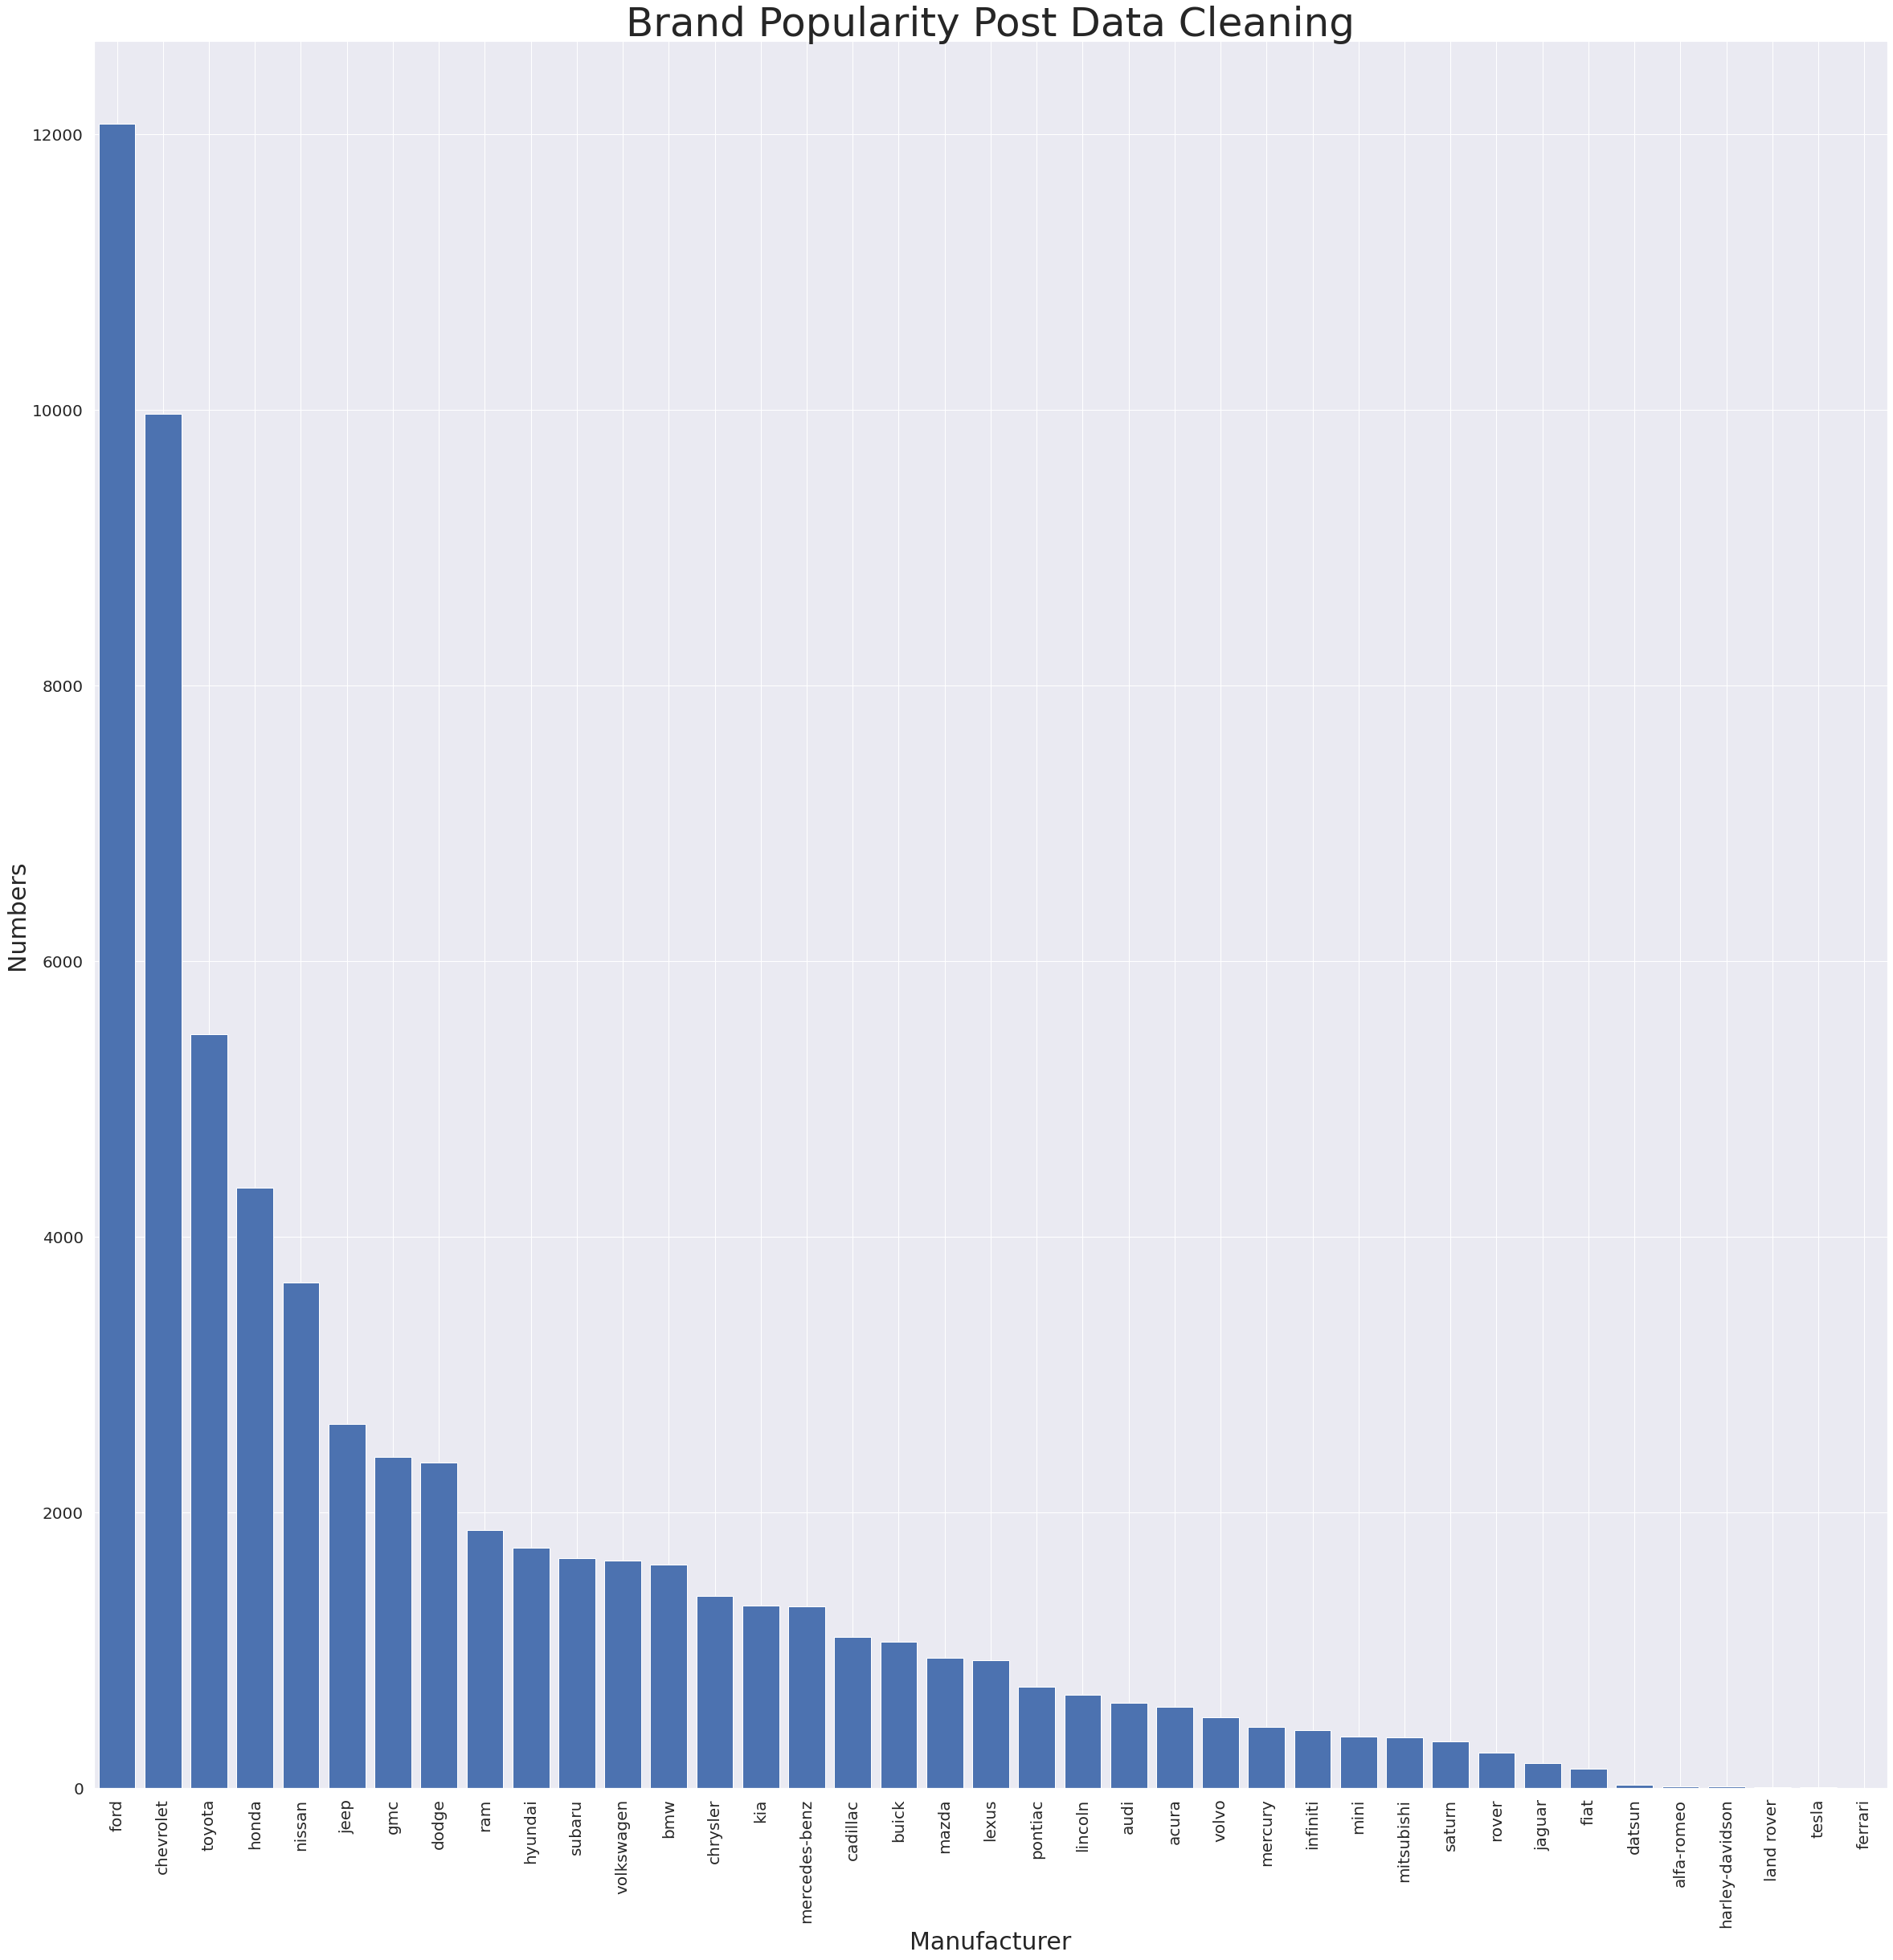

In [29]:
d = data_vehicles_cleaned[['manufacturer', 'id']].groupby('manufacturer').count()
d = d.sort_values(by=["id"],ascending = False)

plt.figure(figsize=(40,40))
plt.bar(d.index, d['id'])
plt.title('Brand Popularity Post Data Cleaning', fontsize=50)
plt.xlabel('Manufacturer', fontsize=30)
plt.ylabel('Numbers', fontsize=30)
plt.tick_params(labelsize=20)
plt.xticks(rotation='vertical')
plt.xlim(-0.5,38.5)
x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.show();

In [30]:
ls1 = data_vehicles_cleaned['manufacturer']
 
se1 = pd.Series(ls1)
 
se1.value_counts().iloc[:3]

ford         12075
chevrolet     9973
toyota        5471
Name: manufacturer, dtype: int64

<font size=3>According to the demonstration, the result is quite consistent with the what we got before data cleaning.

# 4. Linear Regression Model (OLS)

In [31]:
# Define linear regression model
lm = LinearRegression()

In [32]:
data_vehicles_cleaned.head()

,id,price,year,manufacturer,model,condition,odometer,title_status,transmission,drive,size,type,state,lat,long,age
0,7.195109e+09,12500.0,2003.0,mitsubishi,lancer,good,107674.0,clean,manual,4wd,mid-size,sedan,nm,35.0,-107.0,17.0
1,7.184712e+09,16995.0,2007.0,gmc,sierra classic 2500hd,good,254217.0,clean,automatic,4wd,full-size,truck,mn,46.0,-93.0,13.0
2,7.184712e+09,13995.0,2012.0,ford,f-150,good,188406.0,clean,automatic,4wd,full-size,truck,mn,46.0,-93.0,8.0
3,7.184711e+09,7995.0,2010.0,chevrolet,equinox,good,108124.0,clean,automatic,4wd,full-size,SUV,mn,46.0,-93.0,10.0
4,7.184710e+09,8995.0,2011.0,chevrolet,traverse,good,178054.0,clean,automatic,4wd,full-size,SUV,mn,46.0,-93.0,9.0


<font size=3>We begin by preparing the variables we need for OLS.

In [33]:
# Remove variables not interested in regression
data_reg = data_vehicles_cleaned.drop(['id','year','manufacturer','model','state','lat','long'],axis = 1)
data_reg.head()

,price,condition,odometer,title_status,transmission,drive,size,type,age
0,12500.0,good,107674.0,clean,manual,4wd,mid-size,sedan,17.0
1,16995.0,good,254217.0,clean,automatic,4wd,full-size,truck,13.0
2,13995.0,good,188406.0,clean,automatic,4wd,full-size,truck,8.0
3,7995.0,good,108124.0,clean,automatic,4wd,full-size,SUV,10.0
4,8995.0,good,178054.0,clean,automatic,4wd,full-size,SUV,9.0


In [34]:
# Create dummy variables for catogorical variables
dummy_fileds = ['title_status','condition','transmission','drive', 'size','type']
data_reg_dummy = pd.get_dummies(data_reg, columns=dummy_fileds, drop_first = True) # Drop the first one to avoid multicollinearity in regression
data_reg_dummy.head()

,price,odometer,age,title_status_lien,title_status_missing,title_status_rebuilt,condition_fair,condition_good,condition_like new,condition_new,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,12500.0,107674.0,17.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,16995.0,254217.0,13.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,13995.0,188406.0,8.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,7995.0,108124.0,10.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8995.0,178054.0,9.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4.1 Checking Correlation

<font size=3>Before running the OLS regressions, we check correlation between any two variables to avoid including highly-correlated variables.

In [35]:
# Define the dependent variable
dep_var = 'price'

# Decide all the independent variables for use
indep_var = ['odometer', 'age', 
           'title_status_lien','title_status_missing','title_status_rebuilt',
           'condition_fair', 'condition_good','condition_like new','condition_new',
           'transmission_manual', 'transmission_other',
           'drive_fwd', 'drive_rwd',
           'size_full-size', 'size_mid-size','size_sub-compact',
           'type_bus','type_convertible','type_coupe', 'type_hatchback', 'type_mini-van', 'type_offroad', 
           'type_other', 'type_pickup', 'type_sedan', 'type_sedan', 'type_van', 'type_wagon']

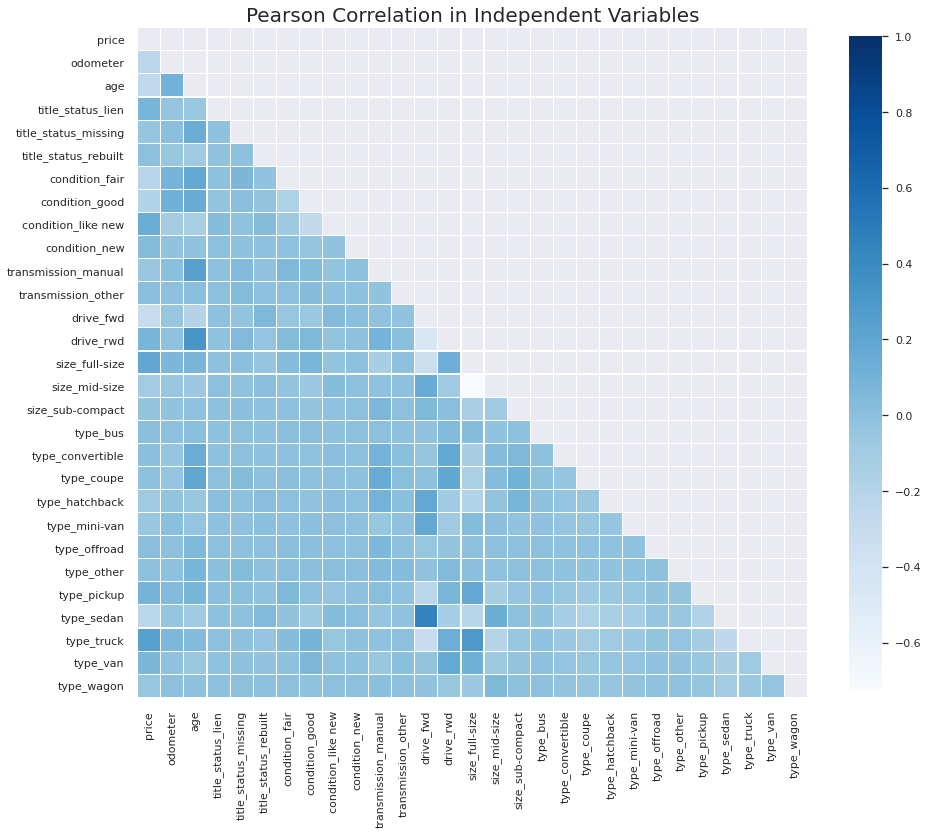

In [36]:
# Firstly, check correlations among independent variables using Pearson Corrlation 
mask = np.zeros_like(data_reg_dummy.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True
           
fig, ax = plt.subplots(figsize=(15, 15)) 
plt.title('Pearson Correlation in Independent Variables',fontsize=20)
sns.heatmap(data_reg_dummy.corr(),linewidths=0.10, vmax = 1.00, square=True, cmap='Blues', linecolor='w', mask=mask, cbar_kws={"shrink": 0.80});          

<font size=3> Above heatmap illustrates the correlation between any two independent variables. It can be observed that most of our independent variables are not correlated or just slightly correlated with each other. In consideration that these are all dummy variables which take 0 or 1, such correlation will not affect our analysis too much.

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


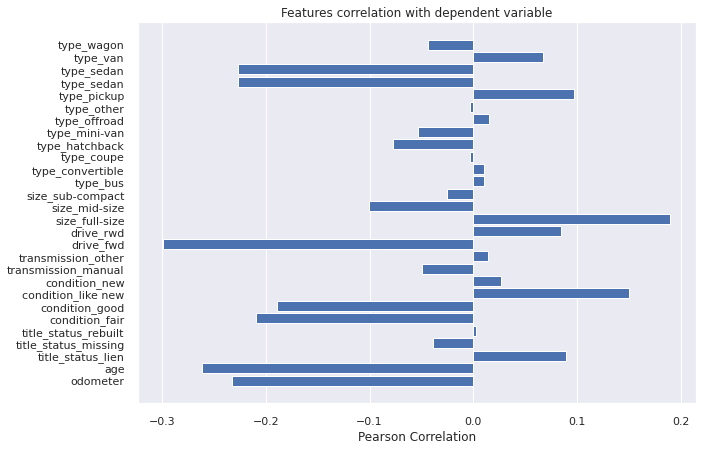

In [37]:
# Visualisation of correlations between dependent variable and each independent variable
# Initiate visualizer
visualizer = FeatureCorrelation(labels=indep_var) 
# Fit the data to the visualizer
visualizer.fit(data_reg_dummy[indep_var].values, data_reg_dummy[dep_var].values)
visualizer.show();

<font size=3>Above figure shows the correlation between each independent variable and dependent variable. Specifically, odometer and age are negatively correlated with price at a relative high level. However, all of the correlations are not strong, which is bounded into [−0.3,0.3]. We don't have serious muticollinearity issues in later analysis.

## 4.2 Running the OLS

<font size=3>Now we simply run a linear regression including all variables and modify it later.

In [38]:
# Run a multiple linear regression including all selected independent variables
data_reg_dummy.rename(columns = {'size_full-size':'size_full_size', 'type_mini-van':'type_mini_van', 'size_mid-size':'size_mid_size', 'condition_like new':'condition_like_new', 'size_sub-compact':'size_sub_compact'}, inplace = True)
reg_1 = sm.ols(formula = 'price ~ odometer + age + title_status_lien + title_status_missing + title_status_rebuilt + condition_fair + condition_good + condition_like_new + condition_new + transmission_manual + transmission_other + drive_fwd + drive_rwd + size_full_size + size_mid_size + size_sub_compact + type_bus + type_convertible + type_coupe + type_hatchback + type_mini_van + type_offroad + type_other + type_pickup + type_sedan + type_truck + type_van + type_wagon', data = data_reg_dummy).fit()
print(reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     1397.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:54:02   Log-Likelihood:            -6.5565e+05
No. Observations:               65270   AIC:                         1.311e+06
Df Residuals:                   65241   BIC:                         1.312e+06
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.461e+04 

<font size=3> From the results, `title_status_rebuilt`, `size_sub_compact` and `type_mini_van` are statistically insignificant. The other variables are very significant, having 0 p-value. The coefficients for significant variables are very large, expect `odometer`. Indeed, the coefficient of `odometer` is $-0.0108$, which is too small compared to expected value. Some modifications on this OLS model is needed. Plots are carried to see potential relationship.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


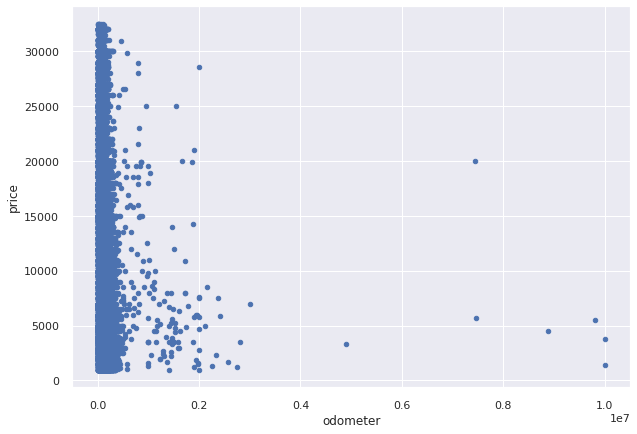

In [39]:
# Relationship between 'odometer' and 'price'
data_reg_dummy.plot('odometer','price', kind = 'scatter');

<font size=3> The scatters are mainly concentrated on the left. To spread the scatter distribution, we add log to `odometer`.

In [40]:
# Check 0 in columns before taking logarithm
0 in data_reg_dummy['price'].values
data_reg_dummy['price_log'] = np.log10(data_reg_dummy['price'])
0 in data_reg_dummy['odometer'].values
data_reg_dummy['odometer_log'] = np.log10(data_reg_dummy['odometer']+1) 

False

True

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


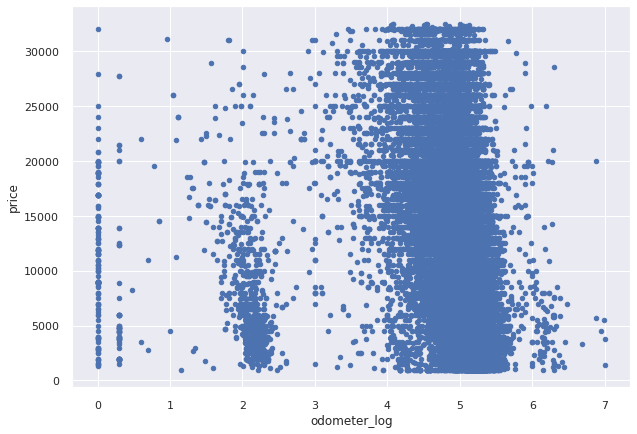

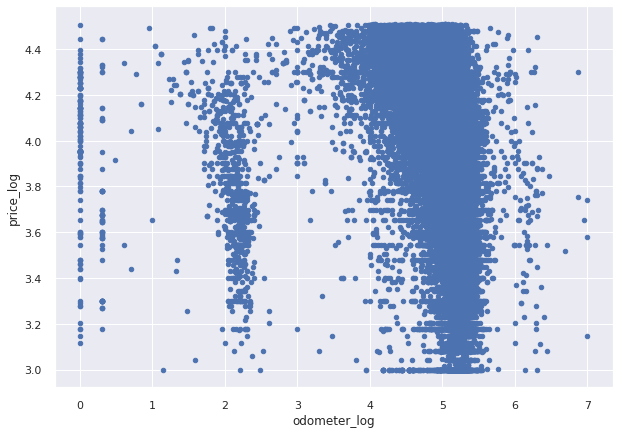

In [41]:
# Two attempts
data_reg_dummy.plot('odometer_log','price', kind = 'scatter');
data_reg_dummy.plot('odometer_log','price_log', kind = 'scatter');

<font size=3> The first one gives a better bell shape. Therefore, add logarithm to `odometer` but not to *price*.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


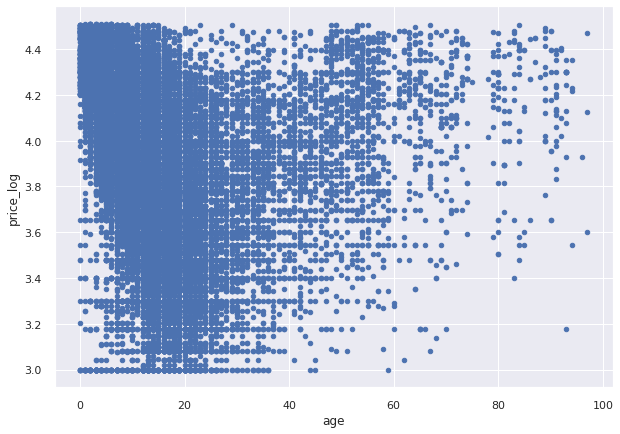

In [42]:
# Also check the distribution between 'age' and 'price'
data_reg_dummy.plot('age','price_log', kind = 'scatter');

<font size=3>From above, the relationship between `age` and `price` is non-linear and shaped like a parabola. Therefore, we add the squared term of `age` into the regression.

In [43]:
# Create square root term for age
data_reg_dummy['age_squared'] = data_reg_dummy['age'].map(lambda x: x**2)

<font size=3>Then, we run the new linear regression with `log odometer` and `age squared`.

In [44]:
# New linear regression
reg_2 = sm.ols(formula = 'price ~ odometer_log + age + age_squared + title_status_lien + title_status_missing + title_status_rebuilt + condition_fair + condition_good + condition_like_new + condition_new + transmission_manual + transmission_other + drive_fwd + drive_rwd + size_full_size + size_mid_size + size_sub_compact + type_bus + type_convertible + type_coupe + type_hatchback + type_mini_van + type_offroad + type_other + type_pickup + type_sedan + type_truck + type_van + type_wagon', data = data_reg_dummy).fit()
print(reg_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     2693.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:54:04   Log-Likelihood:            -6.4528e+05
No. Observations:               65270   AIC:                         1.291e+06
Df Residuals:                   65240   BIC:                         1.291e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              2.64e+04 

<font size=3>Now the coefficient of odometer makes more sense. It can be seen that the coefficient of `odometer`, `age` and the quadratic term of `age` are all very statistically significant in the new regression. Meanwhile, the R-squared has improved a lot, with 54.3% of data explained by the new regression model. Except `condition_new`, `transmission_other` and `size_sub_compact`, the other variables all have 0 p-value, meaning they are pretty significant in explaining the price of a used-car.

<font size=3>Specifically, the price of a used car will decrease by 1539.3519 unit if the odometer the car has run increases by 1%, keeping other variables unchanged. For car ages, 37.3857 is the turning point. The car price will drop as years goes down until reaching 37.3857 and then increase. For the categorical variables, lien cars are priced the highest among all kinds of car status. For used cars conditions, 'like-new' cars are priced the highest, while 'fair' ones are priced the least. Based on car size, cars in larger size have a higher price is consistent in the regression result. Among all types of cars with significant coefficients, offroad used-cars are priced the most expensive, closely followed by trucks.

## 4.3 Prediction Power of OLS

<font size=3>Here we split the data into training and test datasets to test the prediction power of OLS.

In [45]:
# Reset variables needed for testing following the result in the new regression model
# Here we exluded insignificant variables. 'odometer' is still in log and 'age_squared' is include
x = data_reg_dummy[['odometer_log', 'age',  'age_squared',
           'title_status_lien','title_status_missing', 'title_status_rebuilt',
           'condition_fair', 'condition_good','condition_like_new',
           'transmission_manual',
           'drive_fwd', 'drive_rwd',
           'size_full_size', 'size_mid_size',
           'type_bus','type_convertible','type_coupe', 'type_hatchback', 'type_mini_van', 'type_offroad', 
           'type_other', 'type_pickup', 'type_sedan', 'type_truck', 'type_van', 'type_wagon']]
y = data_reg_dummy['price']

# Splitting into training set and testing set
 # 80% are training data, 20% are test data
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = 0)


In [46]:
# Fit the model in training data
train_model = lm.fit(x_train,y_train)

# Predict using test data
predicted = lm.predict(x_test)

In [47]:
# Check accuracy
s = lm.score(x_test,y_test)
print("Our model is accurate up to {:2f}% of the time.".format(s*100))

Our model is accurate up to 54.878504% of the time.


(13054,)

(13054,)

Text(0.5, 0, 'True Value')

Text(0, 0.5, 'Prediction')

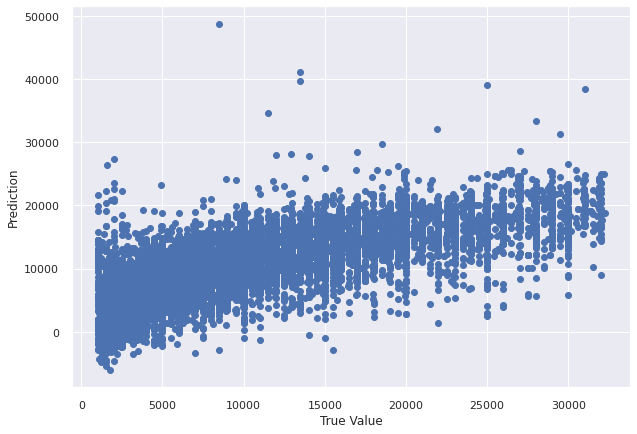

In [48]:
# Visualise
# Double check shape is matched
predicted.shape
y_test.shape

plt.scatter(y_test, predicted, marker='o') 
plt.xlabel('True Value')
plt.ylabel('Prediction')

<font size=3>Although the accuracy of our OLS is over one-half, it still performs very poor in making predictions. In the above figure, the dots are not located along the diagnal, meaning the true value and the prediction value do not coincide well.

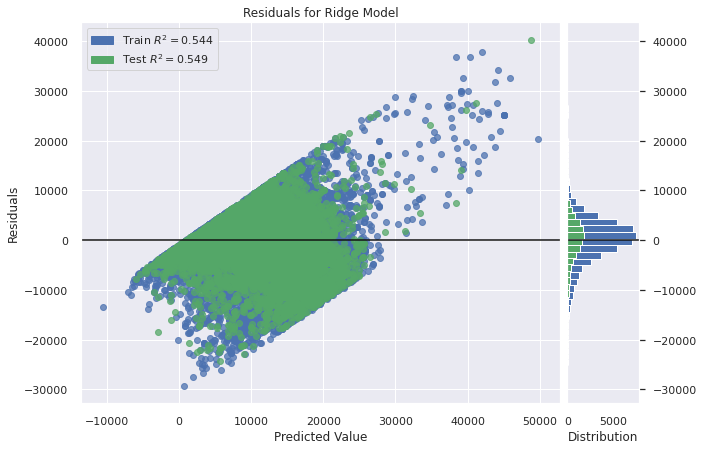

In [49]:
# Check residuals to see potential overlapping issues
# Plot the residuals
model = Ridge()
visualizer = ResidualsPlot(model) # Initiation

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show();

<font size=3>The residuals are highly overlapped with each other when predicted price is between 10000 and 20000, meaning there exists overfitting problem in this range. As predicted value decreasing from 10000 or increasing from 20000, the residuals are more randomaly spreaded and the overfiting problem is relieved.

# 5. Decision Tree Model

<font size=3>Since the OLS performs poor in making predictions, we aim to find another model that can solve this issue. Considering that we have lots of categorical variables in the dataset, decision tree model is chosen to better capture this feature. Unlike OLS, decision tree model is powerful in categorising characteristics of observaions and dealts with categorical variables automatically.

## 5.1 Run Decision Tree

In [50]:
regressor = DecisionTreeRegressor()

In [51]:
# Categorical columns we need to encode
cat_cols = ["condition", "title_status", "transmission", "drive", "size", "type"]

# Save category and number encoding
encoded_map = {}
for columns in cat_cols:
    encode(data_reg[columns])
    values = []
    for x in data_reg[columns]:
        values.append(x)
    keys = []
    for y in data_reg[columns]:
        keys.append(y)
    
    encoder_map = {str(values[i]):str(keys[i]) for i in range(len(keys))}
    encoded_map[columns] = encoder_map

data_reg.head()

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
65272    2.0
65273    0.0
65274    0.0
65275    2.0
65276    0.0
Name: condition, Length: 65270, dtype: float64

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
65272    0.0
65273    0.0
65274    0.0
65275    0.0
65276    0.0
Name: title_status, Length: 65270, dtype: float64

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
65272    1.0
65273    0.0
65274    0.0
65275    0.0
65276    0.0
Name: transmission, Length: 65270, dtype: float64

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
65272    2.0
65273    0.0
65274    0.0
65275    2.0
65276    0.0
Name: drive, Length: 65270, dtype: float64

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0        2.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
65272    1.0
65273    1.0
65274    2.0
65275    0.0
65276    1.0
Name: size, Length: 65270, dtype: float64

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0         9.0
1        10.0
2        10.0
3         0.0
4         0.0
         ... 
65272    11.0
65273    12.0
65274     4.0
65275     3.0
65276     0.0
Name: type, Length: 65270, dtype: float64

,price,condition,odometer,title_status,transmission,drive,size,type,age
0,12500.0,2.0,107674.0,0.0,1.0,0.0,2.0,9.0,17.0
1,16995.0,2.0,254217.0,0.0,0.0,0.0,1.0,10.0,13.0
2,13995.0,2.0,188406.0,0.0,0.0,0.0,1.0,10.0,8.0
3,7995.0,2.0,108124.0,0.0,0.0,0.0,1.0,0.0,10.0
4,8995.0,2.0,178054.0,0.0,0.0,0.0,1.0,0.0,9.0


In [52]:
# Decision tree model will deal with continuous and categorical variables automatically
# We don't need dummy variables any more
# Variables without dummies are stored in data_reg

# Redefine the outcome and predictors needed
indep_tree = data_reg[['condition','odometer','title_status','transmission','drive','size','type','age']]
dep_tree = data_reg['price']

In [53]:
# Fit the model
# DecisionTreeRegressor is used because the outcome variable 'price' is continuous
model = regressor.fit(indep_tree,dep_tree)


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.



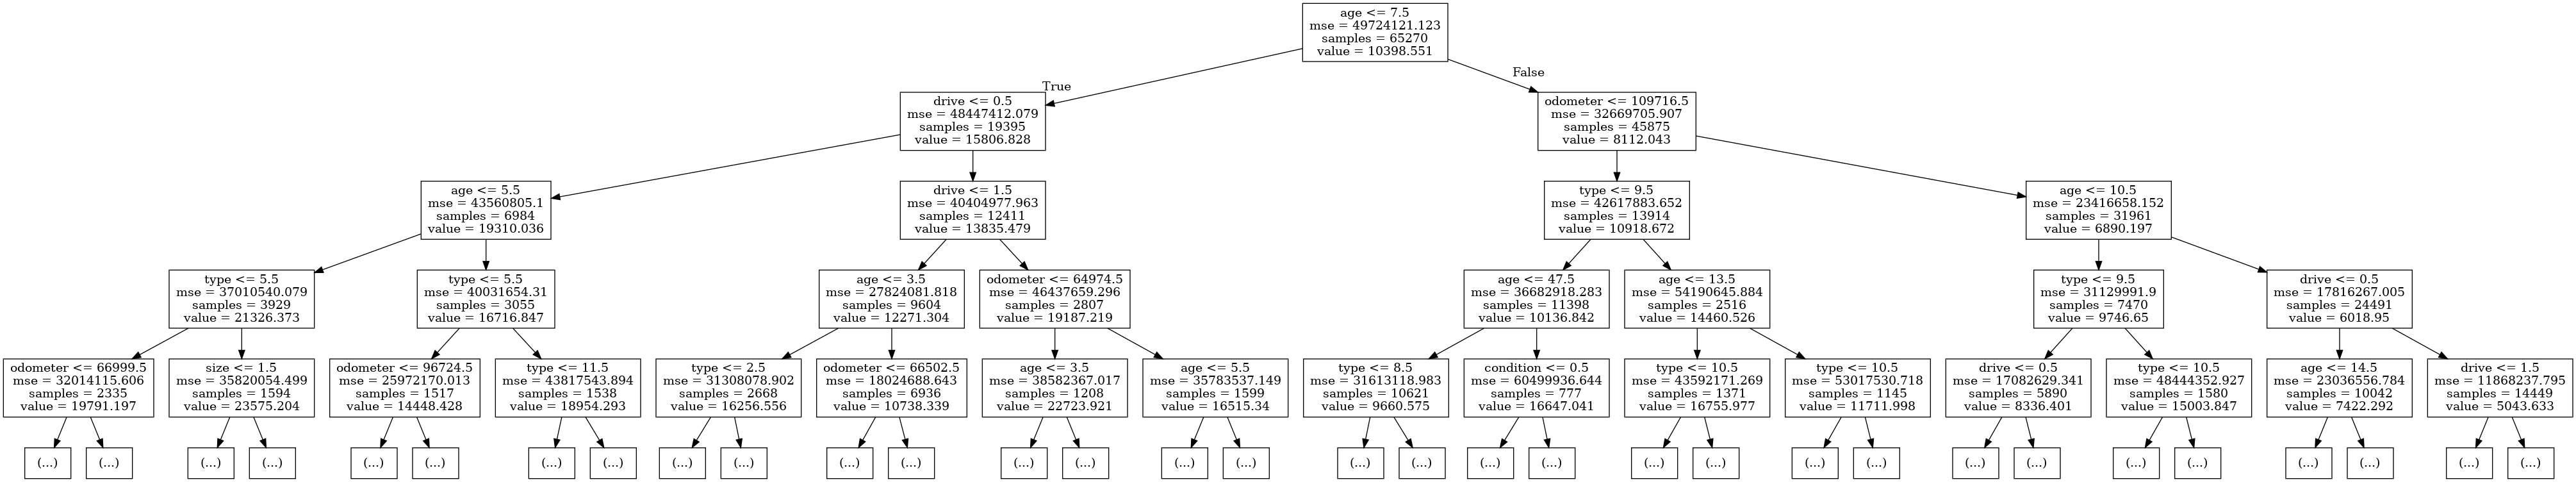

In [54]:
# Plot the model at level of four 
export_graphviz(model, out_file='tree.dot', max_depth=4, feature_names=indep_tree.columns)
! dot -Tpng tree.dot -o tree.png
Image(filename='tree.png')

<font size=3> In the plot of decision tree, it is firstly split at `age`, with 7.5 being the standard for splitting. This means that the most important variable when making decisions is the used-car's age. If age is below or equal to 7.5, followed splitting points are at `drive`. If age is above 7.5, followed splitting points are at `odometer`. From the results, we firstly see that two branches under the first split (i.e. `age`$\leq7.5$) contains very different results/branches. Secondly, in these spitting points, variables `title_status`, `transmission` and `size` do not appear. It is expected that such variables are less important predictors in deciding used-car price.

In [55]:
# Use the importance of variables measure to further verify our findings
importance = pd.DataFrame({"Predictors": pd.Series(indep_tree.columns), "Importance":pd.Series(model.feature_importances_)}).sort_values(by="Importance", ascending=False)
importance['Rank']=importance['Importance'].rank(ascending=0,method='max').apply(int)
importance.reset_index(drop=True)

,Predictors,Importance,Rank
0,age,0.397993,1
1,odometer,0.281581,2
2,type,0.117371,3
3,drive,0.117292,4
4,condition,0.040520,5
5,size,0.024755,6
6,transmission,0.011666,7
7,title_status,0.008822,8


<font size=3>From the figures, the importance among the of independent variables obviously varies. `Age`, `odometer`, `condition` and `drive` are important when growing the decision tree, while `condition`, `size`, `transmission` and `title_status` are not. On the one hand, this finding provides possible explanation for the poor performance of previous OLS. Namely, some variables included in the OLS due to their statistical significance are in fact unimportant predictors. On the other hand, there still exists some consistency between the OLS and decision tree model. `Age` and `odometer` are the most two important variables in decision tree, which are also mainly explored in the OLS part.

## 5.2 Prediction Power of Decision Tree

In [56]:
# Splitting into training set and testing set
 # 80% are training data, 20% are test data
x_train_tree, x_test_tree,y_train_tree,y_test_tree = train_test_split(indep_tree,dep_tree,test_size =0.2, random_state = 0)

In [57]:
# Fit the prediction model
train_model_tree = regressor.fit(x_train_tree, y_train_tree)
predicted_tree = regressor.predict(x_test_tree)

In [58]:
# Check accuracy
t = train_model_tree.score(x_test_tree,y_test_tree)
print("The decision tree model is accurate up to {:2f}% of the time.".format(t*100))

The decision tree model is accurate up to 59.653857% of the time.


Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predictions by Decision Tree Model')

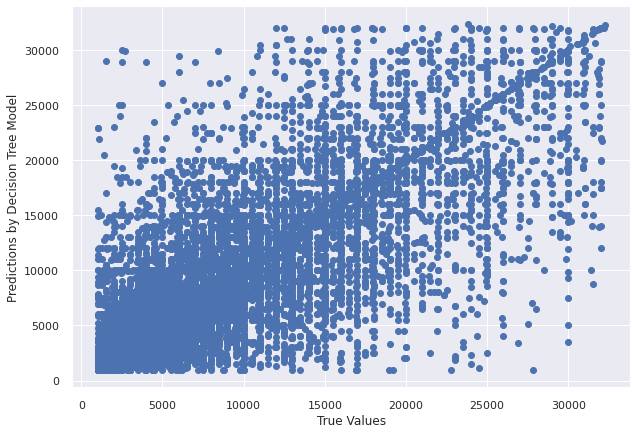

In [59]:
plt.scatter(y_test_tree, predicted_tree)
plt.xlabel("True Values")
plt.ylabel("Predictions by Decision Tree Model")

# No. of observations in the training and test set
#len(x_train_tree)
#len(x_test_tree)
#len(x_train_tree)/len(x_test_tree)

<font size=3>From above figure, decision tree model performs well in making predictions, as the dots are concentrated along the diagnal. The accuracy of the decision tree model also exceeds previous OLS results.

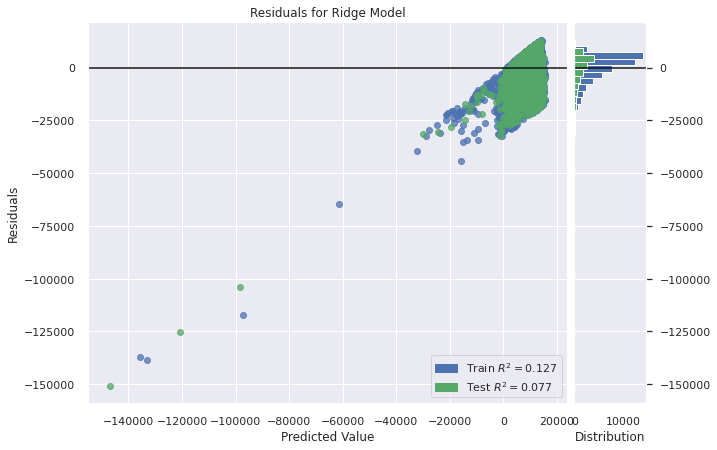

In [60]:
# Check residuals to see potential overlapping issues
# Plot the residuals
model = Ridge()
visualizer = ResidualsPlot(model) # Initiation

visualizer.fit(x_train_tree, y_train_tree)
visualizer.score(x_test_tree, y_test_tree)
visualizer.show();

<font size=3>The residuals are overlapping with each other between 0 to 20000. The overfitting problem still exists and is exaggerated in the decision tree regression, compared with OLS.

<font size=3>**Overall, decision tree model provides higher accuracy than OLS. At the same time, the splits help us identify some unimportant variables. Excluding some of them may reduce the overfitting problem in our model.**

# 6. Conclusion

<font size=3> 
Craigslist is a C2C platform, which means the data is heavily dependent on the accuracy of users' input. This explains some inconsistencies in the correlation between variables and low prediction power for our models, lower than 60%.

However, based on our analyses, we found some insights regarding price of used cars in Craigslist. Consistent with common sense, the price of a used car tends to drop as the odometer increases. Used cars with different status are priced differently and conditions of cars matters to some extent.In terms of transimissions, automatic cars are priced much higher than munual ones in the used-car market.In addition, full-size used-cars are priced higher than mid-size cars, which indicate that larger size have a higher price.Among all types of cars with significant coefficients, offroad used-cars are priced the most expensive. Meanwhile, wagon used-cars have the lowest average list price.

By comparing the two models, it is found that OLS has better explanatory power but performs poorly when making predictions, while the decision tree focuses more on importance variables and performs better in predictions. For used-car age and odometer it run, the findings are consistent in both models. Namely, these two variables are powerful and important predictors in explaining price. For other variables, thanks to OLS's strong explanatory power, although some show weak important in decision tree model, we still manage to get meaningful insights of these contributing factors of used cars.
Overall, with a combination of OLS and decision trees, we extract some valuable information from the dataset. We believe this project will serve as an preliminary reference for the potential buyers and sellers. 

# Reference

<font size=3>Arevalo T. (2020). US Cars Sales Statistics – (2020 Update). Available
online at: https://carsurance.net/blog/cars-sales-statistics. [Accessed on Nov 24th, 2020]  
<br/>
Prescient & Strategic Intelligence Private Limited (2020). Used Car Market Research Report: By Sector (Unorganized, Organized), Vehicle Type (Medium, Small, Large), Propulsion (Internal Combustion Engine, Electric), Sales Medium (Offline, Online) - Global Industry Analysis and Growth Forecast to 2030. Available online at: https://www.psmarketresearch.com/market-analysis/used-car-market. [Accessed on Nov 24th, 2020]  
<br/>
Sandeep (2020). 20 In-Depth Global and US Auto Sales Statistics For 2020. Available
online at: https://policyadvice.net/insurance/insights/us-auto-sales-statistics/. [Accessed on Nov 24th, 2020]
<br/>
Suddhu (2018). “Cleaning Data + EDA.” Kaggle, Kaggle. Available online at: www.kaggle.com/suddhu/cleaning-data-eda. [Accessed on Nov 24th, 2020]

# Appendix

<font size=4>Appendix I: Description of dataset

<font size=3>The dataset for our project is provided on Kaggle. The dataset consists of 423562 rows and 25 columns. This data is scraped every few months in 2020, it contains most all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 18 other categories. 
    
    
Dataset: https://www.kaggle.com/austinreese/craigslist-carstrucks-data 


The following table list all the variables and their definitions


<table class="table table-bordered" >

 <tr>
    <th>Variable name</th><th>Description</th>
 </tr>

<tr>
 <td> Id </td>
 <td>The entry ID for the used car</td>
</tr>

<tr>
<td>Url</td>
<td>URLs refer to advertisement description and will not be used as predictor in used car price prediction</td>
</tr>

<tr>
<td>Region</td>
<td>The Craigslist region of America used car</td>
</tr>

<tr>
<td>Region_url</td>
<td>region_URLs refer to advertisement description and will not be used as predictor in used car price</td>
</tr>

<tr>
<td>Price</td>
<td>The price each used car</td>
</tr>

<tr>
<td>Year</td>
<td>The year for each used car produced</td>
</tr>

<tr>
<td>Manufacturer</td>
<td>The producer of the car</td>
</tr>

<tr>
<td>Model</td>
<td>Model of vehicle</td>
</tr>

<tr>
<td>Condition</td>
<td>Condition of vehicle</td>
</tr>

<tr>
<td>Cylinders</td>
<td>The number of the cylinders</td>
</tr>

<tr>
<td>Fuel</td>
<td>Fuel type of the car</td>
</tr>

<tr>
<td>Odometer</td>
<td>Miles traveled by vehicle</td>
</tr>

<tr>
<td>Title-status</td>
<td>Title status of vehicle</td>
</tr>

<tr>
<td>Transmission</td>
<td>Transmission of vehicle</td>
</tr>

<tr>
<td>Vin</td>
<td>Vehicle identification number</td>
</tr>

<tr>
<td>Drive</td>
<td>Type of drive</td>
</tr>

<tr>
<td>Size</td>
<td>The size of the vehicles</td>
</tr>

<tr>
<td>Type</td>
<td>Generic type of vehicle</td>
</tr>

<tr>
<td>Paint_color</td>
<td>Colour of vehicle</td>
</tr>

<tr>
<td>Image_url</td>
<td>Image URLs refer to advertisement image and will not be used as predictor in used car price</td>
</tr>

<tr>
<td>Description</td>
<td>Listed description of vehicle</td>
</tr>

<tr>
<td>Country</td>
<td>Useless column left in by mistake - will drop this column</td>
</tr>

<tr>
<td>State</td>
<td>State of listing</td>
</tr>

<tr>
<td>Lat</td>
<td>Latitude of listing</td>
</tr>

<tr>
<td>Long</td>
<td>Longitude of listing</td>
</tr>

</tr>
</table>